<a href="https://colab.research.google.com/github/brenorupf/projeto-nba-tera/blob/main/Notebook_NBA_Tera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Tera NBA

Este notebook foi produzido durante o curso 'Data Science & Machine Learning" da Tera.

**Problema de Negócio:** O que a franquia Sacramento Kings precisa fazer para voltar aos playoffs?

##Dados e Variáveis

**Fonte:** Todos os dados utilizados foram retirados através de scrapping do site oficial da NBA (www.nba.com). 

Foram recolhidos dados das últimas 10 temporadas regulares da Conferência Oeste, aquela em que joga o Sacramento Kings.

Nos dataframes originais, encontramos as seguintes variáveis:

* TEAM (object)
* GP - Games Played (int64)
* W - Wins (int64)
* L - Losses (int64)
* WIN% - Win Percentage (float64)
* MIN - Minutes Played (int64)
* PTS - Points (int64)
* FGM - Field Goalds Made (int64)
* FGA - Field Goals Attempted (int64)
* FG% - Field Goal Percentage (float64)
* 3PM - 3 Point Field Goals Made (int64)
* 3PA - 3 Point Field Goals Attempted (int64)
* 3P% - 3 Point Field Goals Percentage (float64)
* FTM - Free Throws Made (int64)
* FTA - Free Throws Attempted (int64)
* FT% - Free Throw Percentage (float64)
* OREB - Offensive Rebounds (int64)
* DREB - Defensive Rebounds (int64)
* REB - Rebounds (int64)
* AST - Assists (int64)
* TOV - Turnovers (int64)
* STL - Steals (int64)
* BLK - Blocks (int64)
* BLKA - Blocked Field Goal Attempts (int64)
* PF - Personal Fouls (int64)
* PFD - Personal Fouls Drawn (int64)
* +/- - Plus Minus (int64)

#Preparação do Ambiente

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Pegamos do site oficial da NBA os dados da Conferência Oeste dos últimos 10 anos. Portanto, o primeiro passo será baixar e criar os dataframes de cada temporada.

In [ ]:
#Criando dataframe de cada temporada.
w_13 = pd.read_csv('west_13.csv')
w_14 = pd.read_csv('west_14.csv')
w_15 = pd.read_csv('west_15.csv')
w_16 = pd.read_csv('west_16.csv')
w_17 = pd.read_csv('west_17.csv')
w_18 = pd.read_csv('west_18.csv')
w_19 = pd.read_csv('west_19.csv')
w_20 = pd.read_csv('west_20.csv')
w_21 = pd.read_csv('west_21.csv')
w_22 = pd.read_csv('west_22.csv')

In [ ]:
w_13

,Unnamed: 0,Unnamed: 0.1,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,0,1,Oklahoma City Thunder,82,60,22,0.732,3966,8669,3126,6504,48.1,598,1588,37.7,1819,2196,82.8,854,2725,3579,1753,1253,679,624,322,1654,1698,755
1,1,2,San Antonio Spurs,82,58,24,0.707,3976,8448,3210,6675,48.1,663,1764,37.6,1365,1725,79.1,666,2721,3387,2058,1206,695,446,405,1427,1565,525
2,2,3,Denver Nuggets,82,57,25,0.695,3981,8704,3339,6983,47.8,521,1518,34.3,1505,2148,70.1,1092,2601,3693,2002,1253,762,533,554,1682,1775,417
3,3,4,Los Angeles Clippers,82,56,26,0.683,3946,8289,3160,6608,47.8,627,1752,35.8,1342,1888,71.1,938,2475,3413,1958,1197,784,461,335,1716,1712,529
4,4,4,Memphis Grizzlies,82,56,26,0.683,3961,7659,2964,6679,44.4,382,1107,34.5,1349,1746,77.3,1059,2445,3504,1715,1144,703,436,450,1660,1643,340
5,5,6,Golden State Warriors,82,47,35,0.573,3961,8296,3130,6840,45.8,658,1632,40.3,1378,1744,79.0,885,2801,3686,1845,1236,567,346,399,1753,1571,73
6,6,7,Houston Rockets,82,45,37,0.549,3956,8688,3124,6782,46.1,867,2369,36.6,1573,2087,75.4,909,2652,3561,1902,1348,679,359,498,1662,1674,285
7,7,7,Los Angeles Lakers,82,45,37,0.549,3951,8381,3041,6640,45.8,715,2015,35.5,1584,2289,69.2,942,2732,3674,1818,1232,576,429,396,1467,1891,95
8,8,9,Utah Jazz,82,43,39,0.524,3976,8038,3046,6710,45.4,507,1385,36.6,1439,1883,76.4,989,2457,3446,1859,1210,690,515,480,1750,1670,-7
9,9,10,Dallas Mavericks,82,41,41,0.500,3996,8293,3182,6892,46.2,606,1628,37.2,1323,1669,79.3,767,2670,3437,1906,1144,648,454,340,1698,1547,-49


In [ ]:
#Eliminando as colunas 'Unnamed: 0' e 'Unnamed: 0.1'
w_13.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
w_14.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
w_15.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
w_16.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
w_17.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
w_18.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
w_19.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
w_20.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
w_21.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
w_22.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [ ]:
w_14

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,San Antonio Spurs,82,62,20,0.756,3951,8639,3326,6844,48.6,698,1757,39.7,1289,1642,78.5,762,2786,3548,2064,1180,604,420,379,1495,1585,633
1,Oklahoma City Thunder,82,59,23,0.720,3961,8705,3194,6782,47.1,664,1839,36.1,1653,2052,80.6,887,2781,3668,1794,1256,678,501,296,1858,1672,520
2,Los Angeles Clippers,82,57,25,0.695,3951,8850,3208,6761,47.4,693,1966,35.2,1741,2384,73.0,858,2668,3526,2016,1136,703,397,284,1767,1919,572
3,Houston Rockets,82,54,28,0.659,3966,8829,3118,6603,47.2,779,2179,35.8,1814,2549,71.2,920,2797,3717,1755,1323,621,461,460,1676,1993,374
4,Portland Trail Blazers,82,54,28,0.659,3971,8753,3207,7134,45.0,770,2071,37.2,1569,1926,81.5,1022,2786,3808,1904,1125,454,387,304,1576,1698,327
5,Golden State Warriors,82,51,31,0.622,3966,8549,3236,7005,46.2,774,2037,38.0,1303,1731,75.3,896,2819,3715,1912,1247,642,407,342,1784,1584,394
6,Memphis Grizzlies,82,50,32,0.610,3961,7884,3122,6723,46.4,405,1147,35.3,1235,1666,74.1,950,2526,3476,1792,1124,631,375,410,1568,1553,129
7,Dallas Mavericks,82,49,33,0.598,3966,8597,3249,6858,47.4,721,1877,38.4,1378,1733,79.5,840,2514,3354,1935,1110,704,356,288,1636,1633,197
8,Phoenix Suns,82,48,34,0.585,3951,8629,3172,6845,46.3,765,2055,37.2,1520,2004,75.8,928,2601,3529,1563,1258,688,374,332,1798,1749,216
9,Minnesota Timberwolves,82,40,42,0.488,3971,8768,3189,7175,44.4,600,1757,34.1,1790,2301,77.8,1024,2644,3668,1963,1142,718,297,457,1504,1936,219


Como teremos que juntar todos os dados em um dataframe só, vamos criar uma coluna em que mostra o ano de cada temporada, de forma que possibilite as análises posteriores. 

In [ ]:
#Incluindo coluna que mostra o ano de cada temporada

ano_13 = pd.DataFrame([2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
                          2013, 2013, 2013, 2013, 2013, 2013, 2013])

ano_14 = pd.DataFrame([2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
                       2014, 2014, 2014, 2014, 2014, 2014]) 

ano_15 = pd.DataFrame([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
                       2015, 2015, 2015, 2015, 2015, 2015,2015])
                 
ano_16 = pd.DataFrame([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
                      2016, 2016, 2016, 2016, 2016, 2016, 2016])

ano_17 = pd.DataFrame([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
                       2017, 2017, 2017, 2017, 2017, 2017])

ano_18 = pd.DataFrame([2018, 2018, 2018, 2018, 2018, 2018, 2018,
                      2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018])
                                      
ano_19 = pd.DataFrame([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
                          2019, 2019, 2019, 2019, 2019, 2019, 2019])
                       
ano_20 = pd.DataFrame([2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
                       2020, 2020, 2020, 2020, 2020, 2020, 2020])

ano_21 = pd.DataFrame([2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,
                          2021, 2021, 2021, 2021, 2021, 2021])
                          
ano_22 = pd.DataFrame([2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
                       2022, 2022, 2022, 2022, 2022, 2022])

w_13['Ano'] = ano_13
w_14['Ano'] = ano_14
w_15['Ano'] = ano_15
w_16['Ano'] = ano_16
w_17['Ano'] = ano_17
w_18['Ano'] = ano_18
w_19['Ano'] = ano_19
w_20['Ano'] = ano_20
w_21['Ano'] = ano_21
w_22['Ano'] = ano_22

In [ ]:
w_18

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,Ano
0,Houston Rockets,82,65,17,0.793,3951,9213,3174,6906,46.0,1256,3470,36.2,1609,2061,78.1,739,2825,3564,1767,1135,699,392,363,1597,1670,695,2018
1,Golden State Warriors,82,58,24,0.707,3946,9304,3509,6979,50.3,926,2369,39.1,1360,1668,81.5,691,2877,3568,2402,1265,656,612,300,1607,1516,490,2018
2,Portland Trail Blazers,82,49,33,0.598,3951,8661,3222,7132,45.2,845,2308,36.6,1372,1715,80.0,835,2893,3728,1599,1109,573,423,418,1599,1564,213,2018
3,New Orleans Pelicans,82,48,34,0.585,3991,9161,3500,7241,48.3,837,2312,36.2,1324,1716,77.2,712,2923,3635,2195,1223,657,485,344,1570,1669,107,2018
4,Oklahoma City Thunder,82,48,34,0.585,3966,8844,3271,7221,45.3,881,2491,35.4,1421,1985,71.6,1024,2671,3695,1750,1147,743,412,377,1653,1750,280,2018
5,Utah Jazz,82,48,34,0.585,3951,8540,3139,6797,46.2,887,2425,36.6,1375,1766,77.9,740,2807,3547,1839,1205,708,420,380,1608,1683,353,2018
6,Minnesota Timberwolves,82,47,35,0.573,3961,8980,3365,7063,47.6,658,1845,35.7,1592,1980,80.4,848,2593,3441,1861,1021,689,345,382,1495,1710,183,2018
7,San Antonio Spurs,82,47,35,0.573,3946,8424,3202,6999,45.7,696,1977,35.2,1324,1715,77.2,849,2777,3626,1868,1078,628,460,318,1408,1619,237,2018
8,Denver Nuggets,82,46,36,0.561,3976,9020,3338,7102,47.0,940,2536,37.1,1404,1830,76.7,902,2748,3650,2059,1226,627,404,391,1533,1699,121,2018
9,LA Clippers,82,42,40,0.512,3941,8937,3302,7004,47.1,777,2196,35.4,1556,2095,74.3,832,2766,3598,1832,1204,628,372,462,1638,1803,3,2018


É necessário também criar uma coluna que mostra se o time foi ou não para os Playoffs.

**Observação importante:** Até 2020, os 8 primeiros colocados de cada conferência iam para os Playoffs. A partir de 2021, somente os 6 primeiros colocados vão diretamente para a próxima fase. Os times que ficam da sétima à décima colocação disputam o Play-In, uma espécie de repescagem que define os últimos dois times classificados. Sendo assim, para fazermos as análises e posteriormente criarmos o modelo, optamos por colocar em todas as temporadas (inclusive de 2013 a 2020) os 6 primeiros colocados como classificados aos Playoffs. Afinal, atualmente a sexta posição é o corte.

In [ ]:
#Incluindo coluna que mostra se o time foi ou não para os Playoffs

classificados = pd.DataFrame([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]) 

w_13['Playoffs'] = classificados
w_14['Playoffs'] = classificados
w_15['Playoffs'] = classificados
w_16['Playoffs'] = classificados
w_17['Playoffs'] = classificados
w_18['Playoffs'] = classificados
w_19['Playoffs'] = classificados
w_20['Playoffs'] = classificados
w_21['Playoffs'] = classificados
w_22['Playoffs'] = classificados

In [ ]:
w_14

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,Ano,Playoffs
0,San Antonio Spurs,82,62,20,0.756,3951,8639,3326,6844,48.6,698,1757,39.7,1289,1642,78.5,762,2786,3548,2064,1180,604,420,379,1495,1585,633,2014,1
1,Oklahoma City Thunder,82,59,23,0.720,3961,8705,3194,6782,47.1,664,1839,36.1,1653,2052,80.6,887,2781,3668,1794,1256,678,501,296,1858,1672,520,2014,1
2,Los Angeles Clippers,82,57,25,0.695,3951,8850,3208,6761,47.4,693,1966,35.2,1741,2384,73.0,858,2668,3526,2016,1136,703,397,284,1767,1919,572,2014,1
3,Houston Rockets,82,54,28,0.659,3966,8829,3118,6603,47.2,779,2179,35.8,1814,2549,71.2,920,2797,3717,1755,1323,621,461,460,1676,1993,374,2014,1
4,Portland Trail Blazers,82,54,28,0.659,3971,8753,3207,7134,45.0,770,2071,37.2,1569,1926,81.5,1022,2786,3808,1904,1125,454,387,304,1576,1698,327,2014,1
5,Golden State Warriors,82,51,31,0.622,3966,8549,3236,7005,46.2,774,2037,38.0,1303,1731,75.3,896,2819,3715,1912,1247,642,407,342,1784,1584,394,2014,1
6,Memphis Grizzlies,82,50,32,0.610,3961,7884,3122,6723,46.4,405,1147,35.3,1235,1666,74.1,950,2526,3476,1792,1124,631,375,410,1568,1553,129,2014,0
7,Dallas Mavericks,82,49,33,0.598,3966,8597,3249,6858,47.4,721,1877,38.4,1378,1733,79.5,840,2514,3354,1935,1110,704,356,288,1636,1633,197,2014,0
8,Phoenix Suns,82,48,34,0.585,3951,8629,3172,6845,46.3,765,2055,37.2,1520,2004,75.8,928,2601,3529,1563,1258,688,374,332,1798,1749,216,2014,0
9,Minnesota Timberwolves,82,40,42,0.488,3971,8768,3189,7175,44.4,600,1757,34.1,1790,2301,77.8,1024,2644,3668,1963,1142,718,297,457,1504,1936,219,2014,0


Como por padrão o índice começa com zero, iremos alterar para que comece com um, de forma que o índice funcione como a coluna que mostra a posição de cada time.

In [ ]:
#Alterando o index, para que comece com 1
w_13.index = np.arange(1, len(w_13) + 1)
w_14.index = np.arange(1, len(w_14) + 1)
w_15.index = np.arange(1, len(w_15) + 1)
w_16.index = np.arange(1, len(w_16) + 1)
w_17.index = np.arange(1, len(w_17) + 1)
w_18.index = np.arange(1, len(w_18) + 1)
w_19.index = np.arange(1, len(w_19) + 1)
w_20.index = np.arange(1, len(w_20) + 1)
w_21.index = np.arange(1, len(w_21) + 1)
w_22.index = np.arange(1, len(w_22) + 1)

In [ ]:
w_22

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,Ano,Playoffs
1,Phoenix Suns,82,64,18,0.780,3946,9416,3581,7389,48.5,951,2616,36.4,1303,1635,79.7,801,2913,3714,2244,1060,702,359,327,1633,1553,615,2022,1
2,Memphis Grizzlies,82,56,26,0.683,3956,9480,3571,7739,46.1,945,2679,35.3,1393,1898,73.4,1159,2873,4032,2131,1082,800,533,496,1620,1625,466,2022,1
3,Golden State Warriors,82,53,29,0.646,3946,9102,3323,7087,46.9,1176,3231,36.4,1280,1665,76.9,800,2930,3730,2223,1221,719,372,317,1723,1474,454,2022,1
4,Dallas Mavericks,82,52,30,0.634,3951,8858,3222,6982,46.1,1073,3063,35.0,1341,1739,77.1,759,2769,3528,1918,1025,552,325,300,1612,1645,271,2022,1
5,Utah Jazz,82,49,33,0.598,3946,9316,3327,7067,47.1,1192,3308,36.0,1470,1916,76.7,884,2916,3800,1836,1148,588,402,352,1547,1664,495,2022,1
6,Denver Nuggets,82,48,34,0.585,3961,9243,3416,7079,48.3,1039,2944,35.3,1372,1725,79.5,752,2865,3617,2279,1189,592,305,392,1639,1632,189,2022,1
7,Minnesota Timberwolves,82,46,36,0.561,3956,9507,3411,7458,45.7,1211,3386,35.8,1474,1894,77.8,921,2700,3621,2106,1175,721,460,397,1786,1715,216,2022,0
8,LA Clippers,82,42,40,0.512,3956,8890,3285,7170,45.8,1047,2802,37.4,1273,1606,79.3,747,2860,3607,1969,1126,608,406,339,1528,1515,2,2022,0
9,New Orleans Pelicans,82,36,46,0.439,3951,8962,3294,7212,45.7,873,2629,33.2,1501,1903,78.9,981,2726,3707,2047,1153,680,328,391,1612,1681,-81,2022,0
10,San Antonio Spurs,82,34,48,0.415,3961,9279,3546,7601,46.7,925,2626,35.2,1262,1673,75.4,901,2815,3716,2289,1043,626,403,403,1483,1553,10,2022,0


In [ ]:
#Configurando para conseguir ver 150 linhas
pd.set_option("display.max_rows", 150)

In [ ]:
#Configurando para conseguir ver 60 colunas
pd.set_option("display.max_columns", 60)

Agora podemos unir todos os dataframes em um só.

In [ ]:
#Criando dataframe com todas as temporadas
df_13_22 = pd.concat([w_13, w_14, w_15, w_16, w_17, w_18, w_19, w_20, w_21, w_22])  

In [ ]:
X = df_13_22[['FG%', '3P%', '3PA', '3PM', 'BLKA', 'DREB']]
X.describe()

,FG%,3P%,3PA,3PM,BLKA,DREB
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,46.047333,35.812667,2245.260000,804.933333,383.160000,2676.280000
std,1.474922,1.851874,515.240016,191.163961,65.874304,170.462817
min,41.400000,30.500000,1107.000000,382.000000,245.000000,2138.000000
25%,45.000000,34.600000,1943.500000,678.000000,332.250000,2545.750000
50%,46.100000,35.600000,2232.500000,799.500000,383.500000,2685.500000
75%,47.000000,37.100000,2539.250000,930.750000,424.000000,2800.000000
max,50.300000,41.600000,3721.000000,1323.000000,554.000000,2990.000000


In [ ]:
df_13_22 #[FG%, 3P%, 3PA, 3PM, BLKA, DREB]

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,Ano,Playoffs
1,Oklahoma City Thunder,82,60,22,0.732,3966,8669,3126,6504,48.1,598,1588,37.7,1819,2196,82.8,854,2725,3579,1753,1253,679,624,322,1654,1698,755,2013,1
2,San Antonio Spurs,82,58,24,0.707,3976,8448,3210,6675,48.1,663,1764,37.6,1365,1725,79.1,666,2721,3387,2058,1206,695,446,405,1427,1565,525,2013,1
3,Denver Nuggets,82,57,25,0.695,3981,8704,3339,6983,47.8,521,1518,34.3,1505,2148,70.1,1092,2601,3693,2002,1253,762,533,554,1682,1775,417,2013,1
4,Los Angeles Clippers,82,56,26,0.683,3946,8289,3160,6608,47.8,627,1752,35.8,1342,1888,71.1,938,2475,3413,1958,1197,784,461,335,1716,1712,529,2013,1
5,Memphis Grizzlies,82,56,26,0.683,3961,7659,2964,6679,44.4,382,1107,34.5,1349,1746,77.3,1059,2445,3504,1715,1144,703,436,450,1660,1643,340,2013,1
6,Golden State Warriors,82,47,35,0.573,3961,8296,3130,6840,45.8,658,1632,40.3,1378,1744,79.0,885,2801,3686,1845,1236,567,346,399,1753,1571,73,2013,1
7,Houston Rockets,82,45,37,0.549,3956,8688,3124,6782,46.1,867,2369,36.6,1573,2087,75.4,909,2652,3561,1902,1348,679,359,498,1662,1674,285,2013,0
8,Los Angeles Lakers,82,45,37,0.549,3951,8381,3041,6640,45.8,715,2015,35.5,1584,2289,69.2,942,2732,3674,1818,1232,576,429,396,1467,1891,95,2013,0
9,Utah Jazz,82,43,39,0.524,3976,8038,3046,6710,45.4,507,1385,36.6,1439,1883,76.4,989,2457,3446,1859,1210,690,515,480,1750,1670,-7,2013,0
10,Dallas Mavericks,82,41,41,0.500,3996,8293,3182,6892,46.2,606,1628,37.2,1323,1669,79.3,767,2670,3437,1906,1144,648,454,340,1698,1547,-49,2013,0


#Análise Exploratória Inicial

In [ ]:
#Checar os tipos das variáveis
df_13_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 15
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TEAM      150 non-null    object 
 1   GP        150 non-null    int64  
 2   W         150 non-null    int64  
 3   L         150 non-null    int64  
 4   WIN%      150 non-null    float64
 5   MIN       150 non-null    int64  
 6   PTS       150 non-null    int64  
 7   FGM       150 non-null    int64  
 8   FGA       150 non-null    int64  
 9   FG%       150 non-null    float64
 10  3PM       150 non-null    int64  
 11  3PA       150 non-null    int64  
 12  3P%       150 non-null    float64
 13  FTM       150 non-null    int64  
 14  FTA       150 non-null    int64  
 15  FT%       150 non-null    float64
 16  OREB      150 non-null    int64  
 17  DREB      150 non-null    int64  
 18  REB       150 non-null    int64  
 19  AST       150 non-null    int64  
 20  TOV       150 non-null    int64  

##Correlação e Hipóteses

Como observado acima, exceto a variável ‘TEAM’, todas as outras são numéricas. Vamos checar a correlação delas com a variável target (‘Playoffs’).

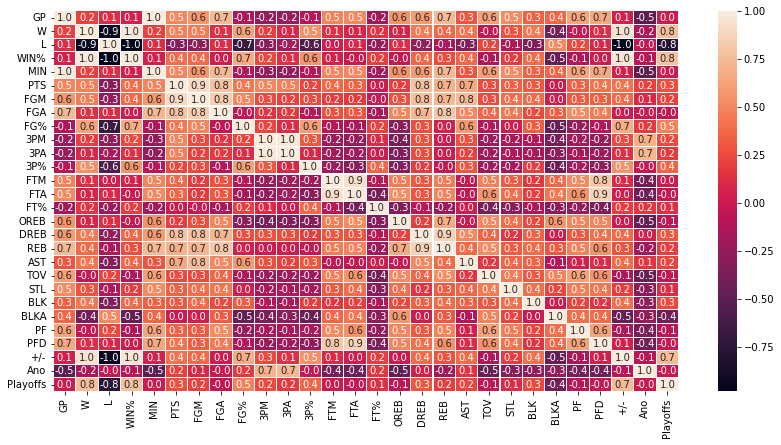

In [ ]:
plt.figure(figsize=(14, 7))
plot = sns.heatmap(df_13_22.corr(), annot = True, fmt=".1f", linewidths=.1)
plot

Abaixo irei separar ‘Playoffs’ das outras variáveis numéricas apenas para pegar a relação ordenada das variáveis que possuem maior correlação com a target.

In [ ]:
target = 'Playoffs'
num_vars = df_13_22.select_dtypes(include=['int', 'float']).columns.tolist()
num_vars.remove(target)

In [ ]:
corr_matrix = df_13_22[num_vars + [target]].corr().round(2)
corr_matrix[target].sort_values(ascending=False)

Playoffs    1.00
WIN%        0.78
W           0.76
+/-         0.75
FG%         0.48
3P%         0.35
DREB        0.31
PTS         0.26
BLK         0.25
3PM         0.25
AST         0.23
FGM         0.22
REB         0.20
3PA         0.18
FT%         0.13
STL         0.11
FTM         0.01
MIN         0.01
GP          0.01
Ano        -0.00
PFD        -0.01
FTA        -0.03
FGA        -0.04
TOV        -0.05
OREB       -0.07
PF         -0.08
BLKA       -0.40
L          -0.77
Name: Playoffs, dtype: float64

Como era de se imaginar, as variáveis ‘WIN% (porcentagem de vitórias)’ e ‘W (vitórias)’ são as que possuem as maiores correlações com ‘Playoffs’. Afinal, quanto mais um time vence, maior a chance de estar entre os classificados. Como na prática ‘WIN%’ e ‘W’ querem dizer a mesma coisa, optamos por fazer as análises somente com ‘W’.

A partir das próximas variáveis com maior correlação, já podemos **levantar algumas hipóteses:**

- FG% (porcentagem de field goals)

São os arremessos de quadra de cada time, considerando arremessos dentro do perímetro de 2 pontos e da linha de 3 pontos, excluindo apenas os lances livres (faltas do basquete). A porcentagem é o cálculo entre Field Goal Attempt (arremessos tentados) divididos pelo Field Goal Made (arremessos convertidos). Quanto melhor neste item, maior a chance do time conseguir a vitória e, consequentemente, maior a chance de ir para os Playoffs. Sendo assim, **a hipótese que levantamos é: O Sacramento Kings possui um ‘FG%’ consideravelmente pior que os sextos colocados das últimas 10 temporadas.**

- 3P% (porcentagem de 3 point field goals)

São os arremessos de quadra de cada time, considerando apenas os arremessos da linha de 3 pontos. A porcentagem é o cálculo entre 3 Point Field Goal Attempt (arremessos tentados) divididos pelo 3 Point Field Goal Made (arremessos convertidos). O raciocínio aqui segue o anterior. Quanto melhor neste item, maior a chance do time conseguir a vitória e, consequentemente, maior a chance de ir para os Playoffs. Sendo assim, **a hipótese que levantamos é: O Sacramento Kings possui um ‘3P%’ consideravelmente pior que os sextos colocados das últimas 10 temporadas.**

- DREB (Defensive Rebounds)

Rebotes defensivos é uma ação defensiva após um arremesso do time adversário que não obteve sucesso. O rebote defensivo propicia a posse de bola podendo iniciar um contra-ataque. Essa ação é uma métrica para avaliar o desempenho defensivo de cada equipe. Sendo assim, **a hipótese que levantamos é: O Sacramento Kings possui um ‘DREB’ consideravelmente pior que os sextos colocados das últimas 10 temporadas.**

- PTS (Pontos)

O critério de pontos na NBA está diretamente ligado ao resultado vitória, sendo o critério principal, onde a equipe que somar o maior número de pontos na partida será a vencedora. Sendo assim, **a hipótese que levantamos é: O Sacramento Kings possui um ‘PTS’ consideravelmente pior que os sextos colocados das últimas 10 temporadas.**

- BLK (Bloqueios)

Ação de impedir com que a bola seja arremessada, através de um bloqueio (também chamado de “toco” no Brasil) ou um tapa na bola. É um importante lance de defesa. Para ser validado, a bola tem que estar no movimento de subida e o defensor não pode tocar na mão do atacante. Sendo assim, **a hipótese que levantamos é: O Sacramento Kings possui um ‘BLK’ consideravelmente pior que os sextos colocados das últimas 10 temporadas.**

**Observação sobre o +/-:** Conforme o site theplayoffs.com.br (https://tinyurl.com/3xxchxxt) *“+/- é um Índice individual que mostra o impacto, em pontos na partida, de um determinado jogador. Ele mostra o saldo de pontos (diferença entre os pontos que seu time e o adversário fizeram) que ocorreu enquanto o jogador em questão esteve em quadra. Exemplo: Russell Westbrook teve um +/- de +15 em um jogo do Oklahoma City Thunder. Isso quer dizer que, enquanto o armador esteve em quadra, o Thunder venceu o adversário por 14 pontos de diferença. No mesmo jogo, Stevens Adams, também do OKC, teve -2, ou seja, o Thunder perdeu por dois pontos enquanto esteve atuando”.* Apesar do ‘+/-’ ter uma alta correlação com ‘Playoffs’, optamos por não utilizá-lo nas análises já que é um índice que diz mais sobre o desempenho dos jogadores.

Para confirmar as hipóteses que levantamos, **em um primeiro momento iremos analisar somente os gráficos das variáveis ‘W’, ‘FG%’, ‘3P%, ‘DREB’, ‘PTS’ e ‘BLK’**, ou seja, as que tiveram uma maior correlação com a variável target.

##Análise das Variáveis ‘W’, ‘FG%’, ‘3P%, ‘DREB’, ‘PTS’ e ‘BLK’

###Comparativo Geral: Classificados X Não Classificados

Primeiro vamos dar uma olhada no comparativo geral entre times classificados (‘Playoffs - 1) e times não classificados (‘Playoffs - 0), começando pelas variáveis que tiveram maior correlação com a target.

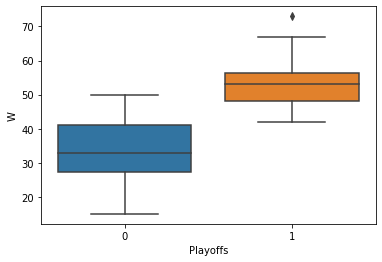

In [ ]:
#Análise 'Playoffs' x 'W'
sns.boxplot(x="Playoffs", y="W", data=df_13_22)

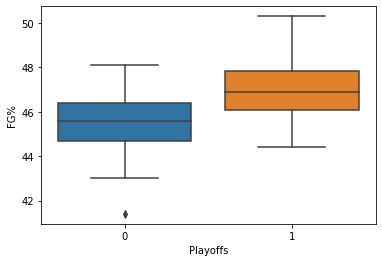

In [ ]:
#Análise 'Playoffs' x 'FG%' 
sns.boxplot(x="Playoffs", y="FG%", data=df_13_22)

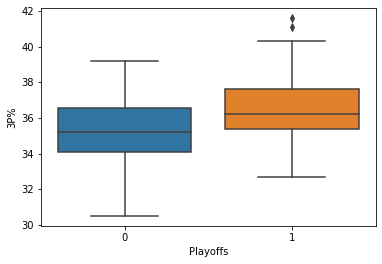

In [ ]:
#Análise 'Playoffs' x '3P%' 
sns.boxplot(x="Playoffs", y="3P%", data=df_13_22)

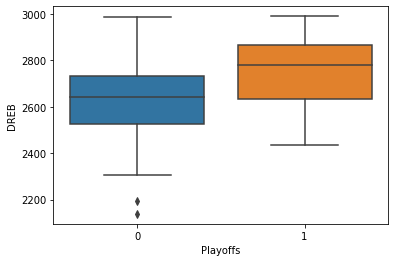

In [ ]:
#Análise 'Playoffs' x 'DREB(rebotes defensivos)' 
sns.boxplot(x="Playoffs", y="DREB", data=df_13_22)

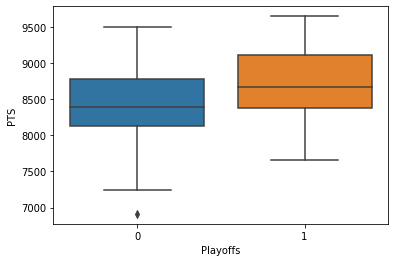

In [ ]:
#Análise 'Playoffs' x 'PTS(pontos)'
sns.boxplot(x="Playoffs", y="PTS", data=df_13_22)

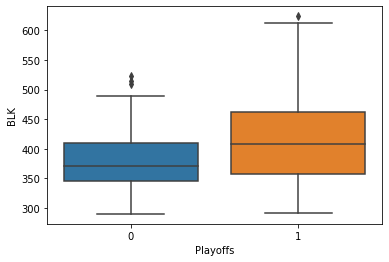

In [ ]:
#Análise 'Playoffs' x 'BLK(bloqueios)'  
sns.boxplot(x="Playoffs", y="BLK", data=df_13_22)

Agora vamos comparar a diferença entre as médias gerais. 

In [ ]:
df_13_22.groupby(['Playoffs']).mean().round(2)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,Ano
Playoffs,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,79.9,33.76,46.14,0.42,3860.59,8445.70,3133.59,6890.31,45.47,766.17,2169.29,35.28,1412.36,1853.41,76.29,845.69,2633.79,3479.48,1832.84,1147.52,616.09,381.52,404.81,1631.79,1634.33,-183.2,2017.5
1,80.0,53.18,26.82,0.66,3864.58,8716.32,3218.82,6864.18,46.91,863.08,2359.22,36.61,1415.60,1841.23,77.13,830.18,2740.02,3570.20,1922.58,1135.63,633.57,414.62,350.68,1607.75,1630.07,407.8,2017.5


Em seguida, verificar o comparativo das médias gerais ano a ano.

In [ ]:
df_13_22.groupby(['Ano','Playoffs']).mean().round(2)

GP      W      L  WIN%      MIN      PTS      FGM      FGA  \
Ano  Playoffs                                                                 
2013 0         82.0  35.33  46.67  0.43  3964.33  8109.33  3049.67  6761.22   
     1         82.0  55.67  26.33  0.68  3965.17  8344.17  3154.83  6714.83   
2014 0         82.0  37.44  44.56  0.46  3959.33  8343.11  3121.78  6866.89   
     1         82.0  56.17  25.83  0.69  3961.00  8720.83  3214.83  6854.83   
2015 0         82.0  34.78  47.22  0.42  3967.67  8246.22  3086.00  6899.44   
     1         82.0  56.67  25.33  0.69  3966.00  8540.17  3191.67  6910.83   
2016 0         82.0  32.00  50.00  0.39  3963.22  8338.00  3069.44  6896.33   
     1         82.0  55.67  26.33  0.68  3968.50  8754.67  3253.67  6956.17   
2017 0         82.0  33.78  48.22  0.41  3966.56  8592.11  3179.56  7007.44   
     1         82.0  55.33  26.67  0.67  3956.00  8918.00  3261.83  6943.33   
2018 0         82.0  34.56  47.44  0.42  3955.44  8598.22  3224.22  7050.00   
     1         82.0  52.67  29.33  0.64  3959.33  8953.83  3302.50  7046.00   
2019 0         82.0  36.22  45.78  0.44  3961.56  9116.33  3384.67  7304.89   
     1         82.0  52.67  29.33  0.64  3961.00  9336.00  3425.00  7353.83   
2020 0         71.0  30.33  40.67  0.42  3434.67  8036.22  2939.67  6387.89   
     1         72.0  46.50  25.50  0.65  3479.33  8166.67  2961.33  6330.00   
2021 0         72.0  30.67  41.33  0.43  3473.22  8067.56  2969.44  6453.44   
     1         72.0  46.83  25.17  0.65  3478.50  8193.00  3015.83  6308.17   
2022 0         82.0  32.44  49.56  0.40  3959.89  9009.89  3311.44  7275.56   
     1         82.0  53.67  28.33  0.65  3951.00  9235.83  3406.67  7223.83   

                 FG%      3PM      3PA    3P%      FTM      FTA    FT%  \
Ano  Playoffs                                                            
2013 0         45.11   604.78  1709.56  35.26  1405.22  1863.67  75.67   
     1         47.00   574.83  1560.17  36.70  1459.67  1907.83  76.57   
2014 0         45.47   609.67  1686.89  35.99  1489.89  1963.22  75.89   
     1         46.92   729.67  1974.83  37.00  1561.50  2047.33  76.68   
2015 0         44.74   590.78  1723.22  34.30  1483.44  1976.11  75.01   
     1         46.18   758.33  2070.50  36.50  1398.50  1853.50  75.78   
2016 0         44.53   658.44  1913.78  34.37  1540.67  2038.67  75.69   
     1         46.77   798.67  2153.83  36.97  1448.67  1900.17  76.47   
2017 0         45.34   757.56  2124.67  35.61  1475.44  1899.56  77.70   
     1         46.98   873.33  2380.67  36.75  1521.00  1991.50  76.47   
2018 0         45.72   791.00  2225.67  35.56  1358.78  1791.67  75.83   
     1         46.88   938.67  2562.50  36.68  1410.17  1818.50  77.72   
2019 0         46.31   855.44  2417.89  35.52  1491.56  1951.89  76.41   
     1         46.58  1023.67  2850.33  35.92  1462.33  1907.00  76.83   
2020 0         45.98   878.22  2444.11  35.88  1278.67  1633.11  78.28   
     1         46.82   889.50  2475.83  35.98  1354.50  1742.00  77.72   
2021 0         46.01   903.11  2531.11  35.62  1225.56  1607.22  76.34   
     1         47.78   981.50  2590.00  37.85  1179.83  1481.50  79.87   
2022 0         45.51  1012.67  2916.00  34.72  1374.33  1809.00  76.03   
     1         47.17  1062.67  2973.50  35.73  1359.83  1763.00  77.22   

                 OREB     DREB      REB      AST      TOV     STL     BLK  \
Ano  Playoffs                                                               
2013 0         927.11  2524.78  3451.89  1821.00  1224.56  631.22  412.56   
     1         915.67  2628.00  3543.67  1888.50  1214.83  698.33  474.33   
2014 0         924.78  2582.33  3507.11  1783.67  1195.11  641.22  390.44   
     1         890.83  2772.83  3663.67  1907.50  1211.17  617.00  428.83   
2015 0         949.33  2640.78  3590.11  1729.44  1184.89  619.33  399.22   
     1         856.00  2739.33  3595.33  1945.83  1153.33  676.83  412.50   
2016 0         884.33  2657.56  3

###Comparativo: Média dos Sextos Colocados x Média Sacramento

Até agora vimos um panorama mais geral, porém, acreditamos não ser correto apenas separar os dados entre times classificados (‘Playoffs - 1) e times não classificados (‘Playoffs - 0) já que assim os dados vão carregar um viés. Afinal, dentro dos dados dos times classificados irão vir as informações dos primeiros, segundos, terceiros, quartos e quintos colocados.

Para fazermos análises mais precisas, precisamos separar os dados apenas dos sextos colocados de cada temporada e compará-los com os do Sacramento Kings, já que a sexta colocação é a posição de corte para classificação aos Playoffs.

In [ ]:
#Criar um dataframe somente com os dados dos sextos colocados
sixth_place = df_13_22.loc[6]
sixth_place

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,Ano,Playoffs
6,Golden State Warriors,82,47,35,0.573,3961,8296,3130,6840,45.8,658,1632,40.3,1378,1744,79.0,885,2801,3686,1845,1236,567,346,399,1753,1571,73,2013,1
6,Golden State Warriors,82,51,31,0.622,3966,8549,3236,7005,46.2,774,2037,38.0,1303,1731,75.3,896,2819,3715,1912,1247,642,407,342,1784,1584,394,2014,1
6,Portland Trail Blazers,82,51,31,0.622,3971,8429,3175,7049,45.0,807,2231,36.2,1272,1589,80.1,879,2881,3760,1799,1117,525,372,297,1494,1534,347,2015,1
6,Dallas Mavericks,82,42,40,0.512,4001,8388,3064,6900,44.4,806,2342,34.4,1454,1831,79.4,751,2781,3532,1813,1047,560,306,363,1595,1757,-25,2016,1
6,Oklahoma City Thunder,82,47,35,0.573,3961,8741,3237,7169,45.2,692,2116,32.7,1575,2113,74.5,1002,2821,3823,1721,1230,648,408,450,1715,1697,62,2017,1
6,Utah Jazz,82,48,34,0.585,3951,8540,3139,6797,46.2,887,2425,36.6,1375,1766,77.9,740,2807,3547,1839,1205,708,420,380,1608,1683,353,2018,1
6,Oklahoma City Thunder,82,49,33,0.598,3971,9387,3497,7706,45.4,932,2677,34.8,1461,2049,71.3,1031,2911,3942,1917,1145,766,425,415,1839,1844,279,2019,1
6,Utah Jazz,72,44,28,0.611,3471,8013,2886,6130,47.1,963,2537,38.0,1278,1641,77.9,656,2577,3233,1615,1089,438,292,329,1468,1501,178,2020,1
6,Los Angeles Lakers,72,42,30,0.583,3491,7887,2925,6197,47.2,796,2248,35.4,1241,1679,73.9,695,2490,3185,1775,1095,562,386,327,1377,1530,201,2021,1
6,Denver Nuggets,82,48,34,0.585,3961,9243,3416,7079,48.3,1039,2944,35.3,1372,1725,79.5,752,2865,3617,2279,1189,592,305,392,1639,1632,189,2022,1


In [ ]:
#Resetar o índex 
sixth_place.reset_index(inplace=True, drop=True)

In [ ]:
sixth_place

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,Ano,Playoffs
0,Golden State Warriors,82,47,35,0.573,3961,8296,3130,6840,45.8,658,1632,40.3,1378,1744,79.0,885,2801,3686,1845,1236,567,346,399,1753,1571,73,2013,1
1,Golden State Warriors,82,51,31,0.622,3966,8549,3236,7005,46.2,774,2037,38.0,1303,1731,75.3,896,2819,3715,1912,1247,642,407,342,1784,1584,394,2014,1
2,Portland Trail Blazers,82,51,31,0.622,3971,8429,3175,7049,45.0,807,2231,36.2,1272,1589,80.1,879,2881,3760,1799,1117,525,372,297,1494,1534,347,2015,1
3,Dallas Mavericks,82,42,40,0.512,4001,8388,3064,6900,44.4,806,2342,34.4,1454,1831,79.4,751,2781,3532,1813,1047,560,306,363,1595,1757,-25,2016,1
4,Oklahoma City Thunder,82,47,35,0.573,3961,8741,3237,7169,45.2,692,2116,32.7,1575,2113,74.5,1002,2821,3823,1721,1230,648,408,450,1715,1697,62,2017,1
5,Utah Jazz,82,48,34,0.585,3951,8540,3139,6797,46.2,887,2425,36.6,1375,1766,77.9,740,2807,3547,1839,1205,708,420,380,1608,1683,353,2018,1
6,Oklahoma City Thunder,82,49,33,0.598,3971,9387,3497,7706,45.4,932,2677,34.8,1461,2049,71.3,1031,2911,3942,1917,1145,766,425,415,1839,1844,279,2019,1
7,Utah Jazz,72,44,28,0.611,3471,8013,2886,6130,47.1,963,2537,38.0,1278,1641,77.9,656,2577,3233,1615,1089,438,292,329,1468,1501,178,2020,1
8,Los Angeles Lakers,72,42,30,0.583,3491,7887,2925,6197,47.2,796,2248,35.4,1241,1679,73.9,695,2490,3185,1775,1095,562,386,327,1377,1530,201,2021,1
9,Denver Nuggets,82,48,34,0.585,3961,9243,3416,7079,48.3,1039,2944,35.3,1372,1725,79.5,752,2865,3617,2279,1189,592,305,392,1639,1632,189,2022,1


Para pegar somente os dados dos Kings, primeiro vamos criar um novo dataframe em que o índex seja a coluna ‘TEAM’. 

In [ ]:
df_teams = df_13_22.set_index('TEAM')

In [ ]:
df_teams

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,Ano,Playoffs
TEAM,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Oklahoma City Thunder,82,60,22,0.732,3966,8669,3126,6504,48.1,598,1588,37.7,1819,2196,82.8,854,2725,3579,1753,1253,679,624,322,1654,1698,755,2013,1
San Antonio Spurs,82,58,24,0.707,3976,8448,3210,6675,48.1,663,1764,37.6,1365,1725,79.1,666,2721,3387,2058,1206,695,446,405,1427,1565,525,2013,1
Denver Nuggets,82,57,25,0.695,3981,8704,3339,6983,47.8,521,1518,34.3,1505,2148,70.1,1092,2601,3693,2002,1253,762,533,554,1682,1775,417,2013,1
Los Angeles Clippers,82,56,26,0.683,3946,8289,3160,6608,47.8,627,1752,35.8,1342,1888,71.1,938,2475,3413,1958,1197,784,461,335,1716,1712,529,2013,1
Memphis Grizzlies,82,56,26,0.683,3961,7659,2964,6679,44.4,382,1107,34.5,1349,1746,77.3,1059,2445,3504,1715,1144,703,436,450,1660,1643,340,2013,1
Golden State Warriors,82,47,35,0.573,3961,8296,3130,6840,45.8,658,1632,40.3,1378,1744,79.0,885,2801,3686,1845,1236,567,346,399,1753,1571,73,2013,1
Houston Rockets,82,45,37,0.549,3956,8688,3124,6782,46.1,867,2369,36.6,1573,2087,75.4,909,2652,3561,1902,1348,679,359,498,1662,1674,285,2013,0
Los Angeles Lakers,82,45,37,0.549,3951,8381,3041,6640,45.8,715,2015,35.5,1584,2289,69.2,942,2732,3674,1818,1232,576,429,396,1467,1891,95,2013,0
Utah Jazz,82,43,39,0.524,3976,8038,3046,6710,45.4,507,1385,36.6,1439,1883,76.4,989,2457,3446,1859,1210,690,515,480,1750,1670,-7,2013,0


In [ ]:
#Criar dataframe somente com os dados do Sacramento Kings
kings = df_teams.loc['Sacramento Kings']
kings

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,Ano,Playoffs
TEAM,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Sacramento Kings,82,28,54,0.341,3966,8219,3086,6904,44.7,610,1681,36.3,1437,1869,76.9,943,2385,3328,1708,1199,671,342,517,1717,1636,-400,2013,0
Sacramento Kings,82,28,54,0.341,3966,8241,3026,6766,44.7,491,1475,33.3,1698,2237,75.9,990,2656,3646,1547,1249,587,318,459,1849,1897,-238,2014,0
Sacramento Kings,82,29,53,0.354,3971,8310,3010,6617,45.5,461,1350,34.1,1829,2400,76.2,895,2728,3623,1667,1333,550,324,508,1696,1958,-304,2015,0
Sacramento Kings,82,33,49,0.402,3961,8740,3283,7083,46.4,660,1839,35.9,1514,2089,72.5,868,2760,3628,2009,1326,733,368,437,1676,1800,-203,2016,0
Sacramento Kings,82,32,50,0.390,3976,8430,3105,6734,46.1,737,1960,37.6,1483,1913,77.5,715,2652,3367,1844,1201,627,324,420,1667,1646,-318,2017,0
Sacramento Kings,82,27,55,0.329,3951,8104,3179,7063,45.0,738,1967,37.5,1008,1371,73.5,776,2578,3354,1768,1125,643,340,389,1639,1422,-573,2018,0
Sacramento Kings,82,39,43,0.476,3946,9363,3541,7637,46.4,927,2455,37.8,1354,1865,72.6,906,2819,3725,2083,1095,679,363,420,1751,1753,-92,2019,0
Sacramento Kings,72,31,41,0.431,3491,7927,2943,6364,46.2,914,2511,36.4,1127,1464,77.0,695,2372,3067,1713,1043,556,293,304,1595,1404,-147,2020,0
Sacramento Kings,72,31,41,0.431,3461,8189,3067,6382,48.1,874,2400,36.4,1181,1585,74.5,674,2307,2981,1836,963,543,358,336,1400,1348,-265,2021,0


In [ ]:
#Resetar o índex
kings.reset_index(inplace=True)

In [ ]:
kings

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,Ano,Playoffs
0,Sacramento Kings,82,28,54,0.341,3966,8219,3086,6904,44.7,610,1681,36.3,1437,1869,76.9,943,2385,3328,1708,1199,671,342,517,1717,1636,-400,2013,0
1,Sacramento Kings,82,28,54,0.341,3966,8241,3026,6766,44.7,491,1475,33.3,1698,2237,75.9,990,2656,3646,1547,1249,587,318,459,1849,1897,-238,2014,0
2,Sacramento Kings,82,29,53,0.354,3971,8310,3010,6617,45.5,461,1350,34.1,1829,2400,76.2,895,2728,3623,1667,1333,550,324,508,1696,1958,-304,2015,0
3,Sacramento Kings,82,33,49,0.402,3961,8740,3283,7083,46.4,660,1839,35.9,1514,2089,72.5,868,2760,3628,2009,1326,733,368,437,1676,1800,-203,2016,0
4,Sacramento Kings,82,32,50,0.390,3976,8430,3105,6734,46.1,737,1960,37.6,1483,1913,77.5,715,2652,3367,1844,1201,627,324,420,1667,1646,-318,2017,0
5,Sacramento Kings,82,27,55,0.329,3951,8104,3179,7063,45.0,738,1967,37.5,1008,1371,73.5,776,2578,3354,1768,1125,643,340,389,1639,1422,-573,2018,0
6,Sacramento Kings,82,39,43,0.476,3946,9363,3541,7637,46.4,927,2455,37.8,1354,1865,72.6,906,2819,3725,2083,1095,679,363,420,1751,1753,-92,2019,0
7,Sacramento Kings,72,31,41,0.431,3491,7927,2943,6364,46.2,914,2511,36.4,1127,1464,77.0,695,2372,3067,1713,1043,556,293,304,1595,1404,-147,2020,0
8,Sacramento Kings,72,31,41,0.431,3461,8189,3067,6382,48.1,874,2400,36.4,1181,1585,74.5,674,2307,2981,1836,963,543,358,336,1400,1348,-265,2021,0
9,Sacramento Kings,82,30,52,0.366,3961,9045,3321,7223,46.0,937,2722,34.4,1466,1908,76.8,784,2737,3521,1943,1156,588,369,395,1552,1665,-448,2022,0


Em seguida vamos dar uma olhada e criar os dataframes com a média geral dos dados das últimas 10 temporadas dos sextos colocados e do Sacramento Kings.

In [ ]:
#Checar as médias dos sextos colocados.
sixth_place.mean().round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


GP            80.00
W             46.90
L             33.10
WIN%           0.59
MIN         3870.50
PTS         8547.30
FGM         3170.50
FGA         6887.20
FG%           46.08
3PM          835.40
3PA         2318.90
3P%           36.17
FTM         1370.90
FTA         1786.80
FT%           76.88
OREB         828.70
DREB        2775.30
REB         3604.00
AST         1851.50
TOV         1160.00
STL          600.80
BLK          366.70
BLKA         369.40
PF          1627.20
PFD         1633.30
+/-          205.10
Ano         2017.50
Playoffs       1.00
dtype: float64

In [ ]:
#Checar as médias do Sacramento.
kings.mean().round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


GP            80.00
W             30.80
L             49.20
WIN%           0.39
MIN         3865.00
PTS         8456.80
FGM         3156.10
FGA         6877.30
FG%           45.91
3PM          734.90
3PA         2036.00
3P%           35.97
FTM         1409.70
FTA         1870.10
FT%           75.34
OREB         824.60
DREB        2599.40
REB         3424.00
AST         1811.80
TOV         1169.00
STL          617.70
BLK          339.90
BLKA         418.50
PF          1654.20
PFD         1652.90
+/-         -298.80
Ano         2017.50
Playoffs       0.00
dtype: float64

In [ ]:
#Criar dataframe com as médias dos sextos colocados
mean_sixth = pd.DataFrame(sixth_place.mean().round(2))
mean_sixth

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,0
GP,80.00
W,46.90
L,33.10
WIN%,0.59
MIN,3870.50
PTS,8547.30
FGM,3170.50
FGA,6887.20
FG%,46.08
3PM,835.40


In [ ]:
#Criar dataframe com as médias do Sacramento.
mean_kings = pd.DataFrame(kings.mean().round(2))
mean_kings

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,0
GP,80.00
W,30.80
L,49.20
WIN%,0.39
MIN,3865.00
PTS,8456.80
FGM,3156.10
FGA,6877.30
FG%,45.91
3PM,734.90


In [ ]:
#renomeando colunas
mean_sixth.rename(columns={0: 'Sextos Colocados'}, inplace=True)
mean_kings.rename(columns={0: 'Sacramento Kings'}, inplace=True)

In [ ]:
mean_sixth

,Sextos Colocados
GP,80.00
W,46.90
L,33.10
WIN%,0.59
MIN,3870.50
PTS,8547.30
FGM,3170.50
FGA,6887.20
FG%,46.08
3PM,835.40


In [ ]:
mean_kings

,Sacramento Kings
GP,80.00
W,30.80
L,49.20
WIN%,0.39
MIN,3865.00
PTS,8456.80
FGM,3156.10
FGA,6877.30
FG%,45.91
3PM,734.90


Agora vamos juntar tudo em um único dataframe.

In [ ]:
#Juntando os dois dataframes
df_means = pd.concat([mean_sixth, mean_kings], axis=1).transpose()  
#Transpose foi para inverter o dataframe

In [ ]:
df_means

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,Ano,Playoffs
Sextos Colocados,80.0,46.9,33.1,0.59,3870.5,8547.3,3170.5,6887.2,46.08,835.4,2318.9,36.17,1370.9,1786.8,76.88,828.7,2775.3,3604.0,1851.5,1160.0,600.8,366.7,369.4,1627.2,1633.3,205.1,2017.5,1.0
Sacramento Kings,80.0,30.8,49.2,0.39,3865.0,8456.8,3156.1,6877.3,45.91,734.9,2036.0,35.97,1409.7,1870.1,75.34,824.6,2599.4,3424.0,1811.8,1169.0,617.7,339.9,418.5,1654.2,1652.9,-298.8,2017.5,0.0


####Gráficos

Chegou o momento de plotarmos os gráficos, comparar os dados dos sextos colocados com os do Sacramento Kings e assim começarmos a levantar os insights e respondermos as hipóteses. 

In [ ]:
#Função para construir o gráfico
def grafico_medias(coluna):
  plot = sns.barplot(data=df_means, y=coluna, x=df_means.index)
  for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=12,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points') 

Primeiro vamos comparar os dados das variáveis que apresentaram uma maior correlação com a target, as colunas: ‘W’, ‘FG%’, ‘3P%’, ‘DREB’, ‘PTS’ e ‘BLK’.

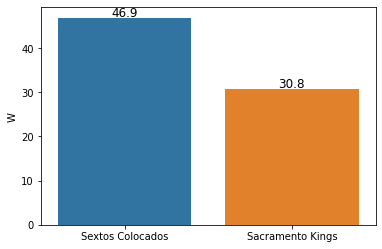

In [ ]:
grafico_medias('W')

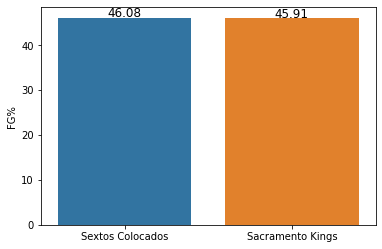

In [ ]:
grafico_medias('FG%')

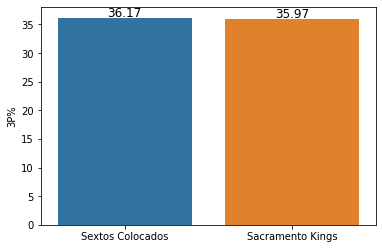

In [ ]:
grafico_medias('3P%')

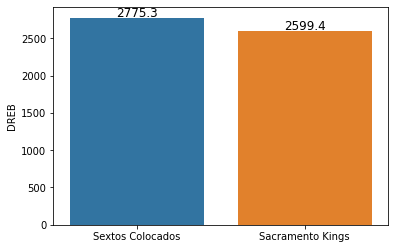

In [ ]:
grafico_medias('DREB')

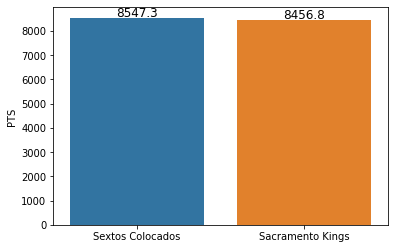

In [ ]:
grafico_medias('PTS')

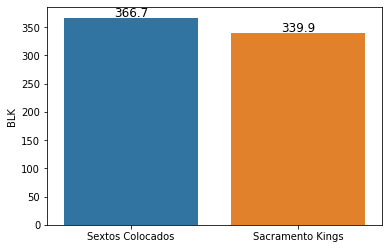

In [ ]:
grafico_medias('BLK')

Primeiras observações sobre os gráficos acima:

- Como esperado, nas últimas 10 temporadas, os sextos colocados possuem uma média de vitórias bem maior do que o Sacramento Kings.

- Porém, surpreendentemente, vimos que nas outras variáveis o Sacramento Kings possui números praticamente idênticos aos dos sextos colocados,  exceto um pouco em ‘DREB’ e ‘BLK’. 

Sendo assim, aparentemente, as hipóteses que levantamos talvez não explicam a não ida do Sacramento aos Playoffs.

Será preciso avaliar também a evolução ano a ano destas variáveis para chegarmos a uma conclusão.

###Evolução Anual: Sextos Colocados X Sacramento

Primeiramente iremos criar um novo dataframe, com os dados dos últimos 10 anos dos sextos colocados e do Sacramento Kings.

In [ ]:
#Criar novo DF
year = pd.concat([sixth_place, kings])

In [ ]:
year

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,Ano,Playoffs
0,Golden State Warriors,82,47,35,0.573,3961,8296,3130,6840,45.8,658,1632,40.3,1378,1744,79.0,885,2801,3686,1845,1236,567,346,399,1753,1571,73,2013,1
1,Golden State Warriors,82,51,31,0.622,3966,8549,3236,7005,46.2,774,2037,38.0,1303,1731,75.3,896,2819,3715,1912,1247,642,407,342,1784,1584,394,2014,1
2,Portland Trail Blazers,82,51,31,0.622,3971,8429,3175,7049,45.0,807,2231,36.2,1272,1589,80.1,879,2881,3760,1799,1117,525,372,297,1494,1534,347,2015,1
3,Dallas Mavericks,82,42,40,0.512,4001,8388,3064,6900,44.4,806,2342,34.4,1454,1831,79.4,751,2781,3532,1813,1047,560,306,363,1595,1757,-25,2016,1
4,Oklahoma City Thunder,82,47,35,0.573,3961,8741,3237,7169,45.2,692,2116,32.7,1575,2113,74.5,1002,2821,3823,1721,1230,648,408,450,1715,1697,62,2017,1
5,Utah Jazz,82,48,34,0.585,3951,8540,3139,6797,46.2,887,2425,36.6,1375,1766,77.9,740,2807,3547,1839,1205,708,420,380,1608,1683,353,2018,1
6,Oklahoma City Thunder,82,49,33,0.598,3971,9387,3497,7706,45.4,932,2677,34.8,1461,2049,71.3,1031,2911,3942,1917,1145,766,425,415,1839,1844,279,2019,1
7,Utah Jazz,72,44,28,0.611,3471,8013,2886,6130,47.1,963,2537,38.0,1278,1641,77.9,656,2577,3233,1615,1089,438,292,329,1468,1501,178,2020,1
8,Los Angeles Lakers,72,42,30,0.583,3491,7887,2925,6197,47.2,796,2248,35.4,1241,1679,73.9,695,2490,3185,1775,1095,562,386,327,1377,1530,201,2021,1
9,Denver Nuggets,82,48,34,0.585,3961,9243,3416,7079,48.3,1039,2944,35.3,1372,1725,79.5,752,2865,3617,2279,1189,592,305,392,1639,1632,189,2022,1


Agora vamos substituir o nome dos times que ficaram em sexto por “Sexto Colocado”, para assim conseguirmos criar os gráficos com os comparativos. 

In [ ]:
year['TEAM'].replace({'Golden State Warriors': 'Sexto Colocado', 'Portland Trail Blazers': 'Sexto Colocado',
                      'Dallas Mavericks': 'Sexto Colocado', 'Oklahoma City Thunder': 'Sexto Colocado',
                      'Utah Jazz': 'Sexto Colocado', 'Los Angeles Lakers': 'Sexto Colocado', 
                      'Denver Nuggets': 'Sexto Colocado'}, inplace=True)

In [ ]:
year

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,Ano,Playoffs
0,Sexto Colocado,82,47,35,0.573,3961,8296,3130,6840,45.8,658,1632,40.3,1378,1744,79.0,885,2801,3686,1845,1236,567,346,399,1753,1571,73,2013,1
1,Sexto Colocado,82,51,31,0.622,3966,8549,3236,7005,46.2,774,2037,38.0,1303,1731,75.3,896,2819,3715,1912,1247,642,407,342,1784,1584,394,2014,1
2,Sexto Colocado,82,51,31,0.622,3971,8429,3175,7049,45.0,807,2231,36.2,1272,1589,80.1,879,2881,3760,1799,1117,525,372,297,1494,1534,347,2015,1
3,Sexto Colocado,82,42,40,0.512,4001,8388,3064,6900,44.4,806,2342,34.4,1454,1831,79.4,751,2781,3532,1813,1047,560,306,363,1595,1757,-25,2016,1
4,Sexto Colocado,82,47,35,0.573,3961,8741,3237,7169,45.2,692,2116,32.7,1575,2113,74.5,1002,2821,3823,1721,1230,648,408,450,1715,1697,62,2017,1
5,Sexto Colocado,82,48,34,0.585,3951,8540,3139,6797,46.2,887,2425,36.6,1375,1766,77.9,740,2807,3547,1839,1205,708,420,380,1608,1683,353,2018,1
6,Sexto Colocado,82,49,33,0.598,3971,9387,3497,7706,45.4,932,2677,34.8,1461,2049,71.3,1031,2911,3942,1917,1145,766,425,415,1839,1844,279,2019,1
7,Sexto Colocado,72,44,28,0.611,3471,8013,2886,6130,47.1,963,2537,38.0,1278,1641,77.9,656,2577,3233,1615,1089,438,292,329,1468,1501,178,2020,1
8,Sexto Colocado,72,42,30,0.583,3491,7887,2925,6197,47.2,796,2248,35.4,1241,1679,73.9,695,2490,3185,1775,1095,562,386,327,1377,1530,201,2021,1
9,Sexto Colocado,82,48,34,0.585,3961,9243,3416,7079,48.3,1039,2944,35.3,1372,1725,79.5,752,2865,3617,2279,1189,592,305,392,1639,1632,189,2022,1


####Gráficos

Em seguida iremos construir a função que irá fazer os gráficos e então comparar os dados das mesmas variáveis: ‘W’, ‘FG%’, ‘3P%’, ‘DREB’, ‘PTS’ e ‘BLK’.

In [ ]:
def grafico_medias_anuais(coluna, tamanho_fonte):
  plt.figure(figsize=(15, 6))
  plot = sns.barplot(data=year, x="Ano", y=coluna, hue="TEAM")
  plt.legend(loc='lower left', bbox_to_anchor=(0, 1))
  for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=tamanho_fonte,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')  

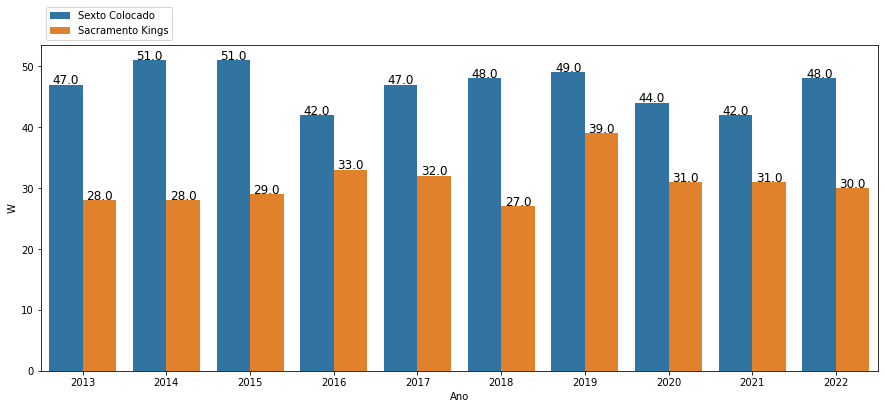

In [ ]:
grafico_medias_anuais('W', 12)

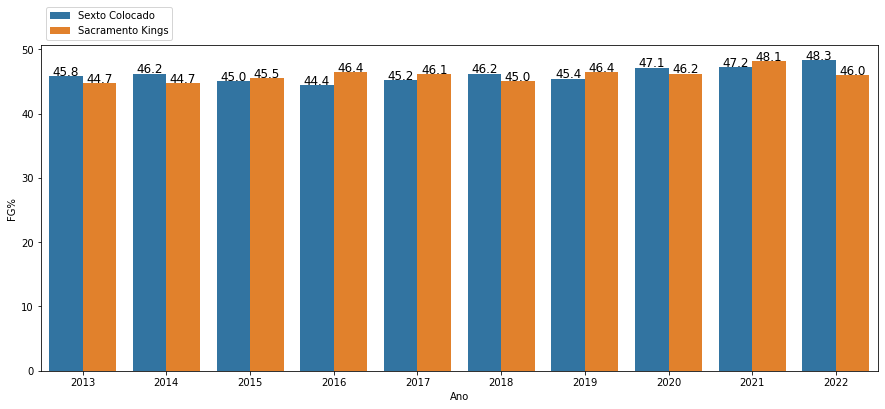

In [ ]:
grafico_medias_anuais('FG%', 12)

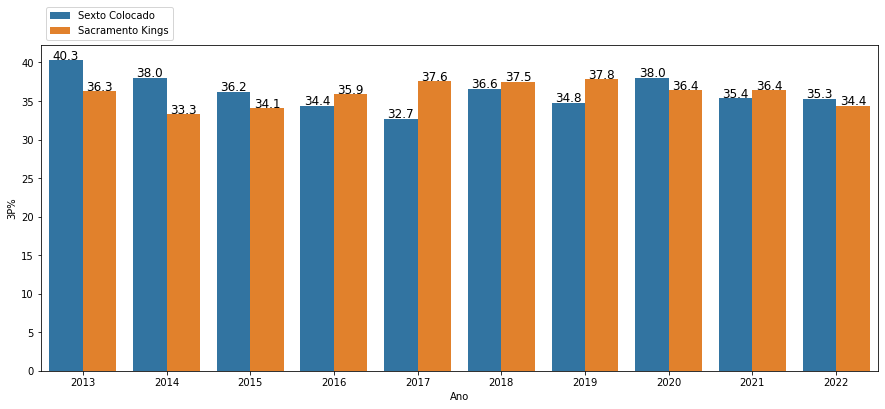

In [ ]:
grafico_medias_anuais('3P%', 12)

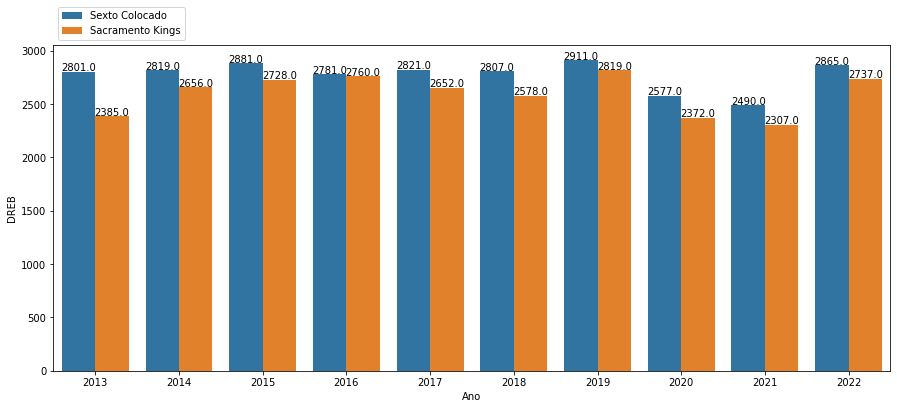

In [ ]:
grafico_medias_anuais('DREB', 10)

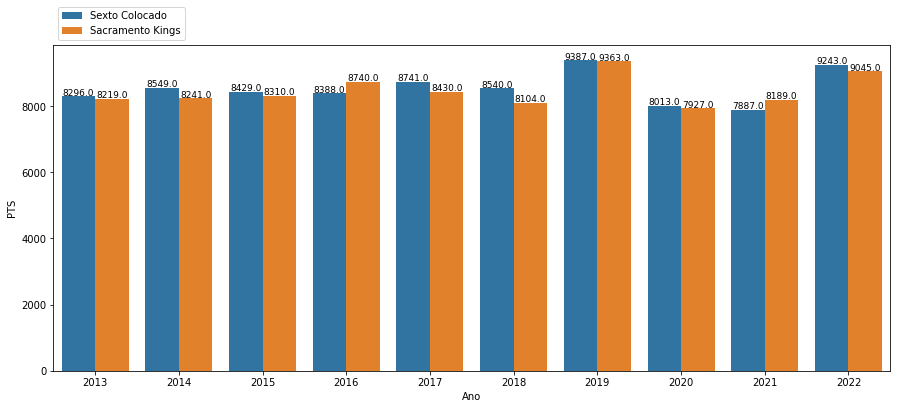

In [ ]:
grafico_medias_anuais('PTS', 9)

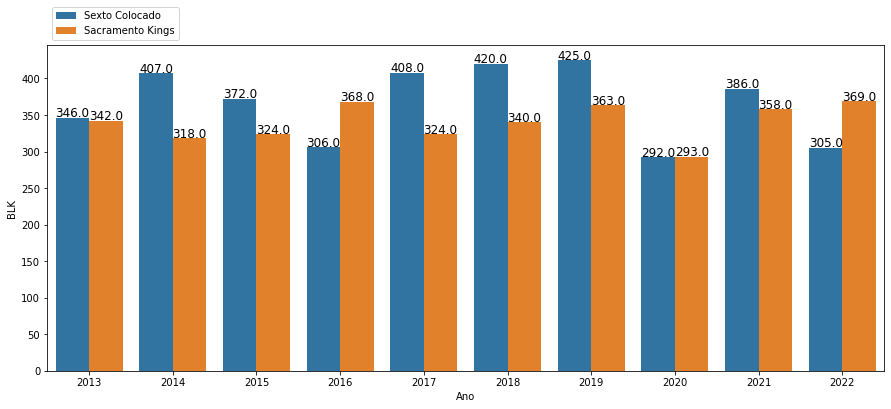

In [ ]:
grafico_medias_anuais('BLK', 12)

Vendo agora o comparativo ano a ano, **podemos concluir que quase todas as hipóteses que levantamos não estão corretas**, consequentemente não explicam de maneira direta a não ida do Sacramento Kings aos Playoffs.

Algumas variáveis que a princípio achamos que seriam chaves, como ‘FG%’, ‘3P%’, ‘PTS’ e ‘BLK’, vimos que em algumas temporadas o Sacramento teve até melhores números do que os sextos colocados.

A única hipótese que talvez ainda possa ser comprovada é em relação a ‘DREB’, a única variável que os Kings tiveram um desempenho abaixo dos sextos em todas as temporadas.   

##Análise das Outras Variáveis

Como as variáveis com maior correlação com a target não trouxeram ainda alguma explicação, decidimos plotar gráficos de todas as outras variáveis para assim, quem sabe, conseguirmos encontrar algo que não foi possível ser visualizado a partir do gráfico de correlação. 

Iremos começar primeiro com os gráficos que trazem a média geral das últimas 10 temporadas.

###Gráficos: Média dos Sextos Colocados x Média Sacramento

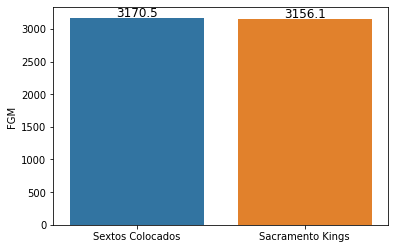

In [ ]:
grafico_medias('FGM')

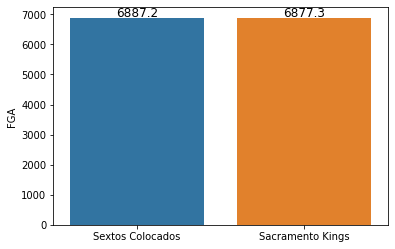

In [ ]:
grafico_medias('FGA')

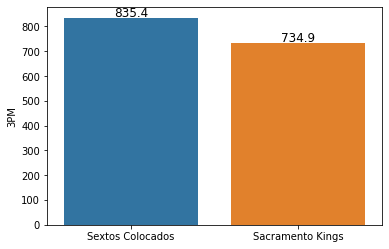

In [ ]:
grafico_medias('3PM')

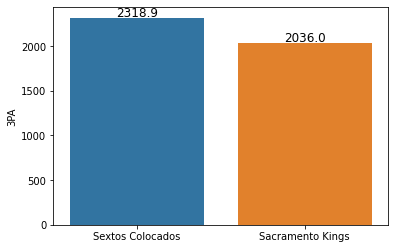

In [ ]:
grafico_medias('3PA')

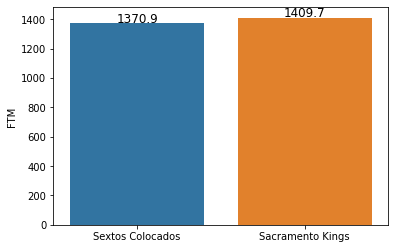

In [ ]:
grafico_medias('FTM')

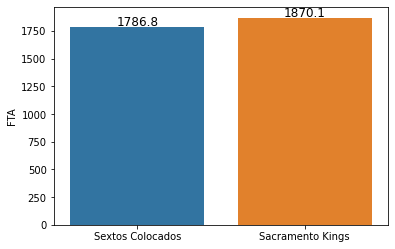

In [ ]:
grafico_medias('FTA')

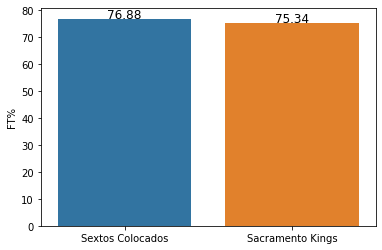

In [ ]:
grafico_medias('FT%')

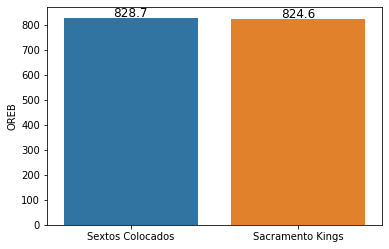

In [ ]:
grafico_medias('OREB')

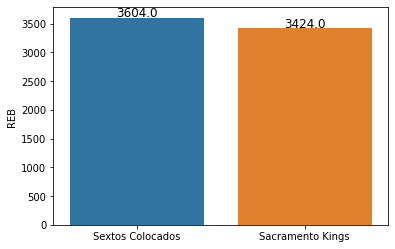

In [ ]:
grafico_medias('REB')

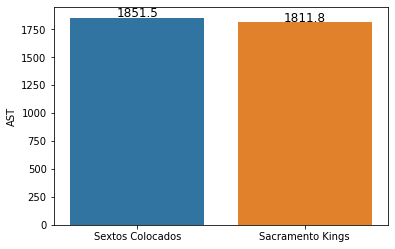

In [ ]:
grafico_medias('AST')

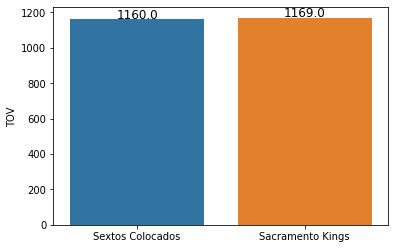

In [ ]:
grafico_medias('TOV')

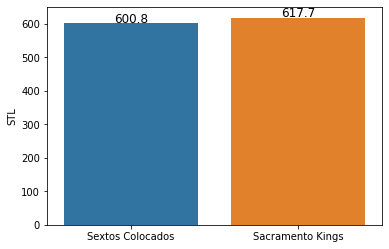

In [ ]:
grafico_medias('STL')

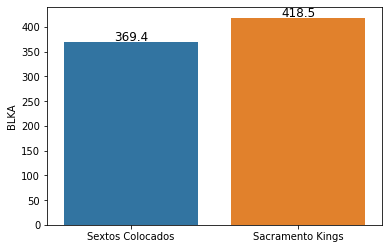

In [ ]:
grafico_medias('BLKA')

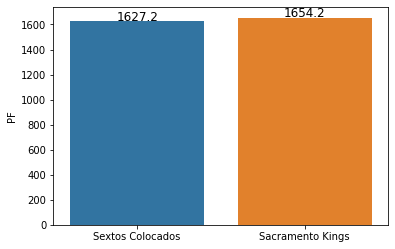

In [ ]:
grafico_medias('PF')

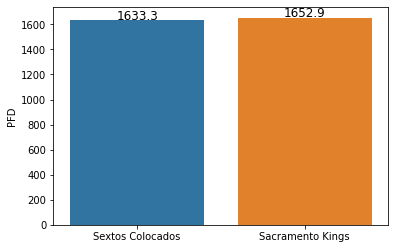

In [ ]:
grafico_medias('PFD')

Esta nova série de gráficos trouxe algumas informações interessantes. Vamos olhar também o comparativo ano a ano antes de fazer as análises. 

###Gráficos: Evolução Anual Sextos Colocados X Sacramento

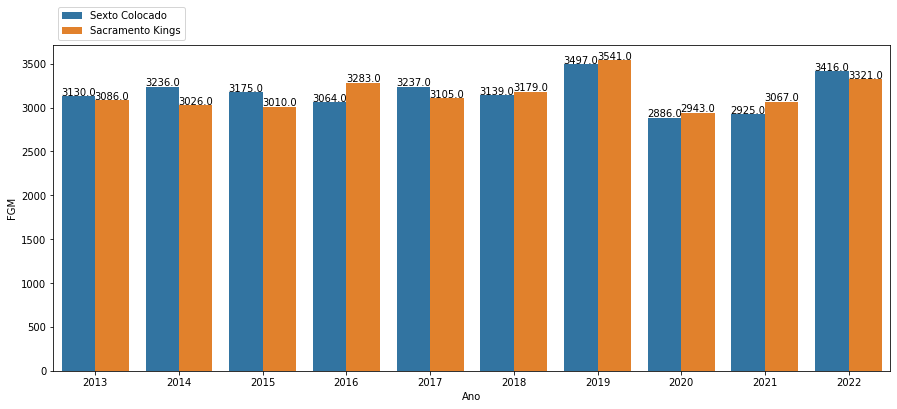

In [ ]:
grafico_medias_anuais('FGM', 10)

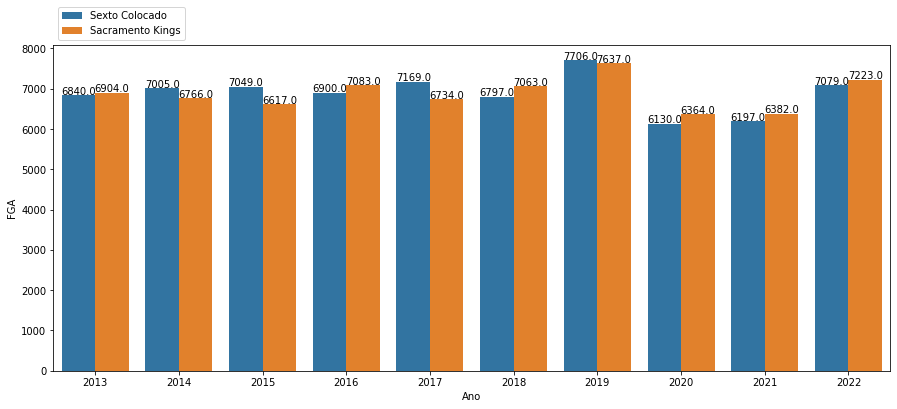

In [ ]:
grafico_medias_anuais('FGA', 10)

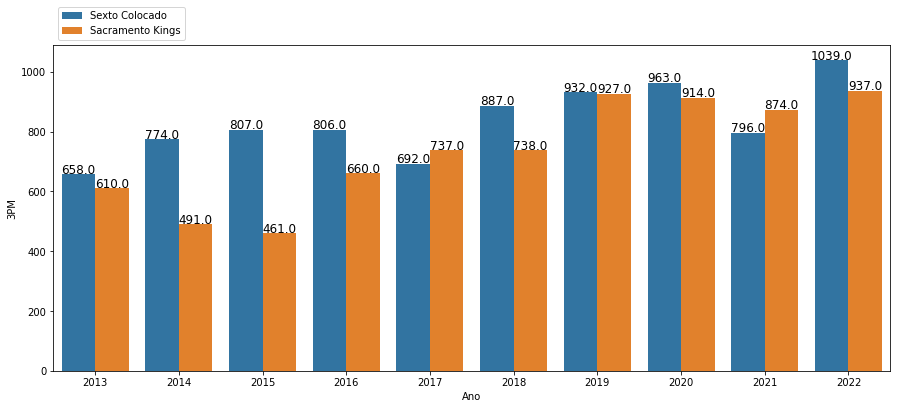

In [ ]:
grafico_medias_anuais('3PM', 12)

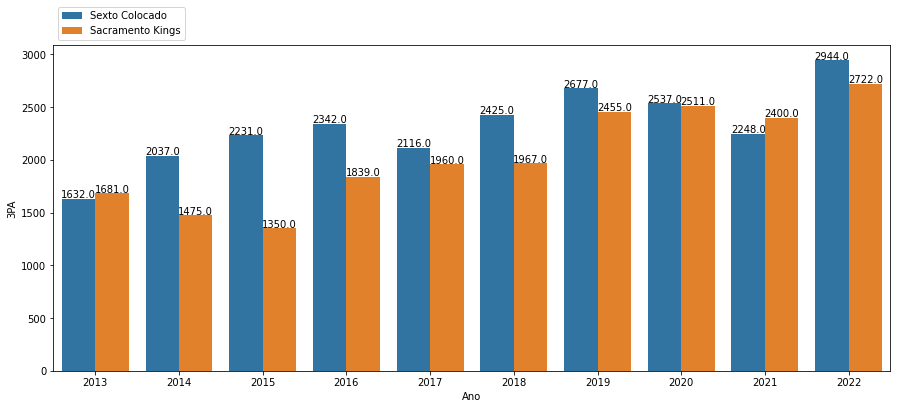

In [ ]:
grafico_medias_anuais('3PA', 10)

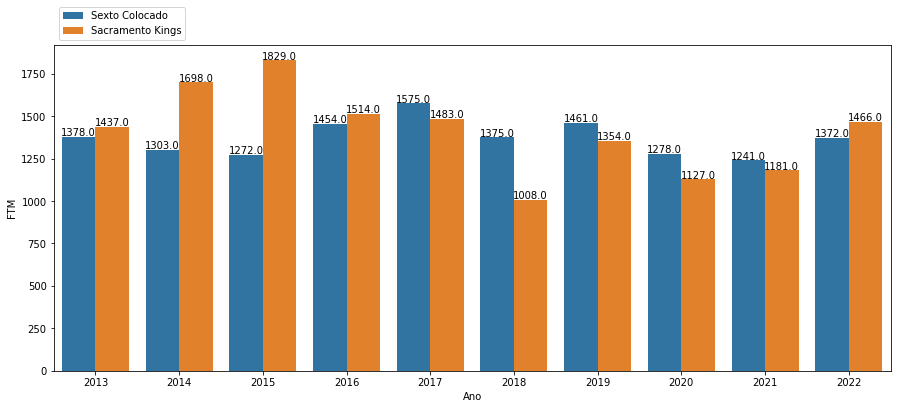

In [ ]:
grafico_medias_anuais('FTM', 10)

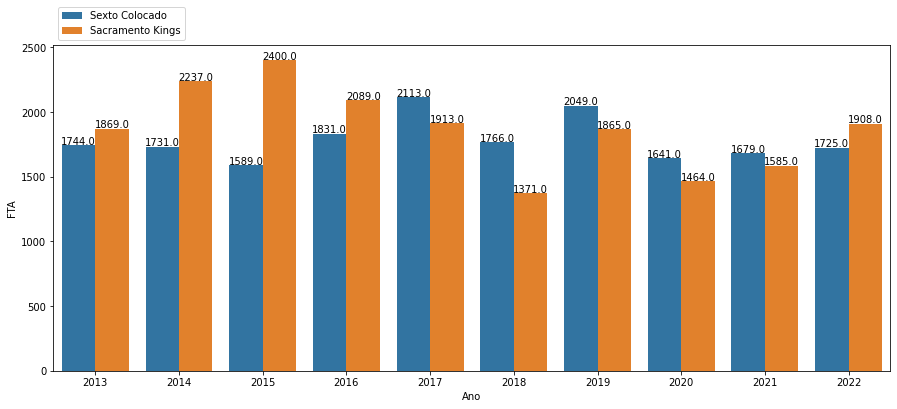

In [ ]:
grafico_medias_anuais('FTA', 10)

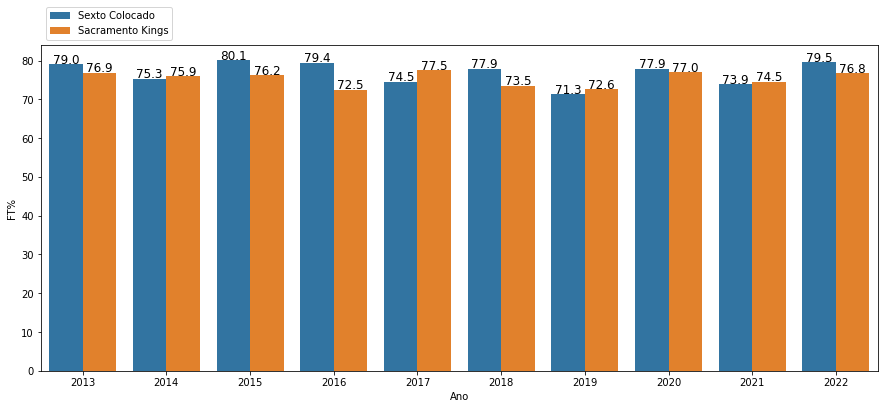

In [ ]:
grafico_medias_anuais('FT%', 12)

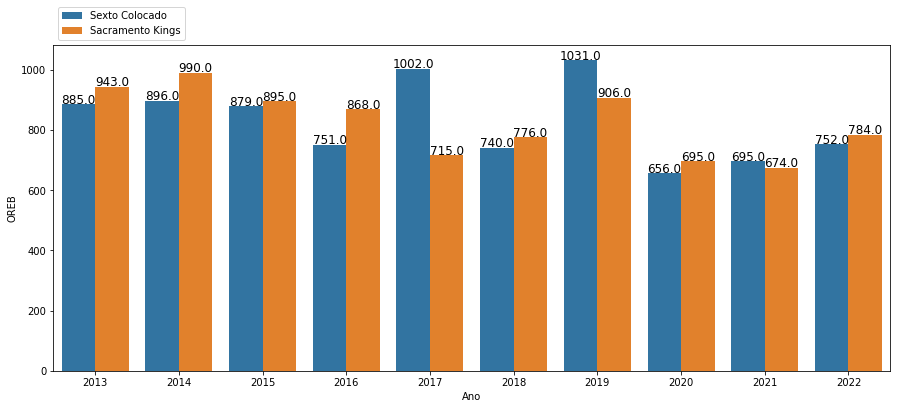

In [ ]:
grafico_medias_anuais('OREB', 12)

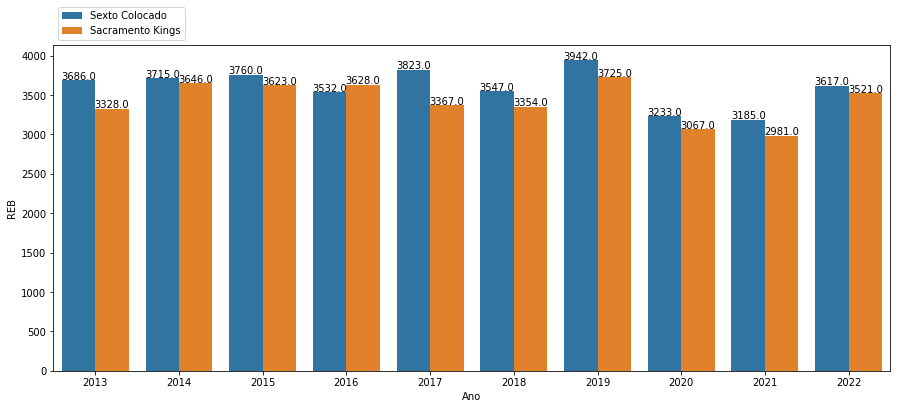

In [ ]:
grafico_medias_anuais('REB', 10)

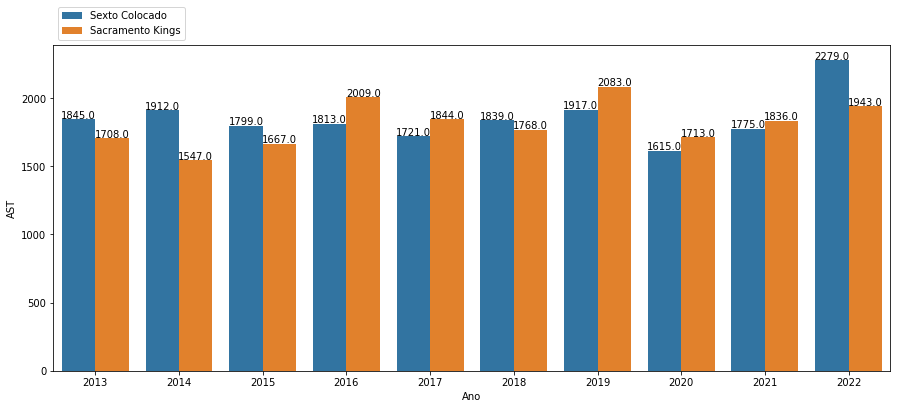

In [ ]:
grafico_medias_anuais('AST', 10)

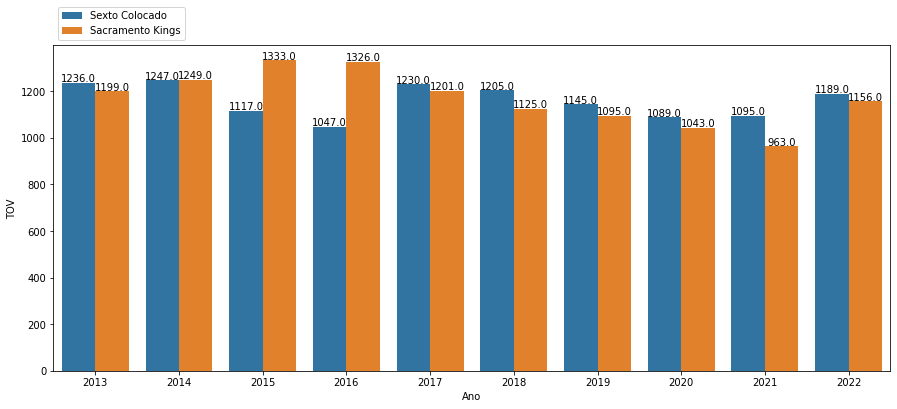

In [ ]:
grafico_medias_anuais('TOV', 10)

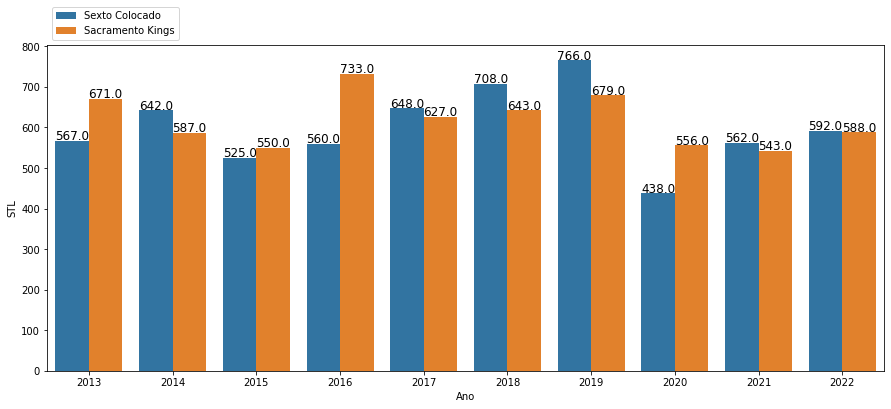

In [ ]:
grafico_medias_anuais('STL', 12)

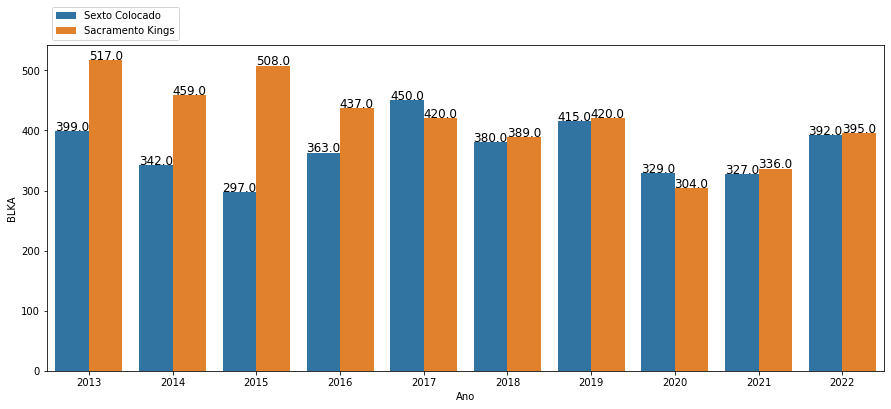

In [ ]:
grafico_medias_anuais('BLKA', 12)

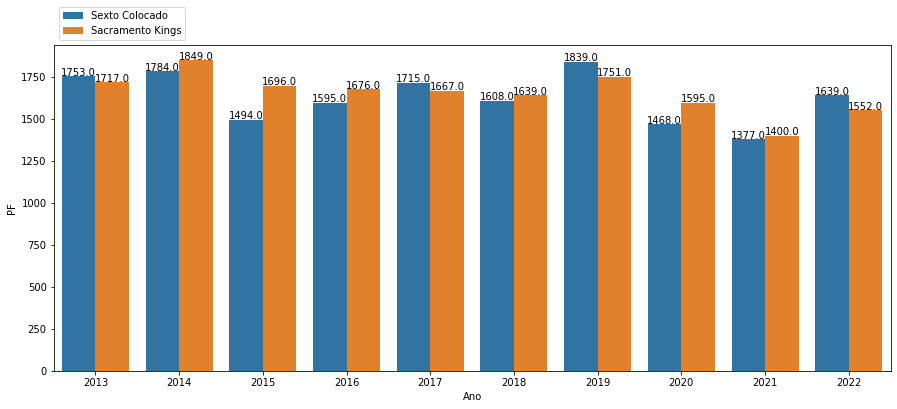

In [ ]:
grafico_medias_anuais('PF', 10)

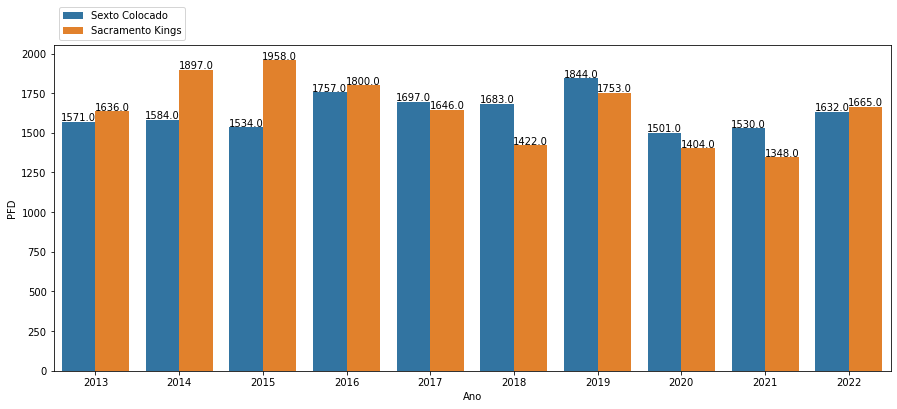

In [ ]:
grafico_medias_anuais('PFD', 10)

##Insights

Agora sim, tendo visto também a evolução ano a ano de todas as variáveis, alguns insights surgiram:

- Em relação às variáveis sobre bolas de 3 pontos.

A variável ‘3P%’ (porcentagem de arremessos convertidos da linha de 3 pontos) é uma das que possuem maior correlação com a target (‘Playoffs’). Isto era algo que, mesmo antes de começarmos o trabalho, imaginávamos que iria acontecer. Afinal, quem acompanha NBA sabe que na última década houve uma clara mudança no estilo do jogo, graças ao time Golden State Warriors. Nos últimos 10 anos a equipe de São Francisco chegou em 6 finais e venceu 4. Isto ocorreu graças a uma nova dinâmica em que eles passaram a valorizar (e fazer) muito mais as bolas de 3 pontos. A imposição deles sobre os adversários foi tamanha, que todas as franquias passaram a praticar um jogo que valorizasse mais os arremessos de 3 pontos. 

Podemos ver esta evolução claramente nos dois gráficos abaixo (ambos retirados do dataframe que possui os números de todos os times da Conferência Oeste nos últimos 10 anos). O primeiro mostra a evolução da variável ‘3PA’ (tentativas de arremessos de 3 pontos) e o segundo da variável ‘3PM’ (arremessos de 3 pontos feitos).

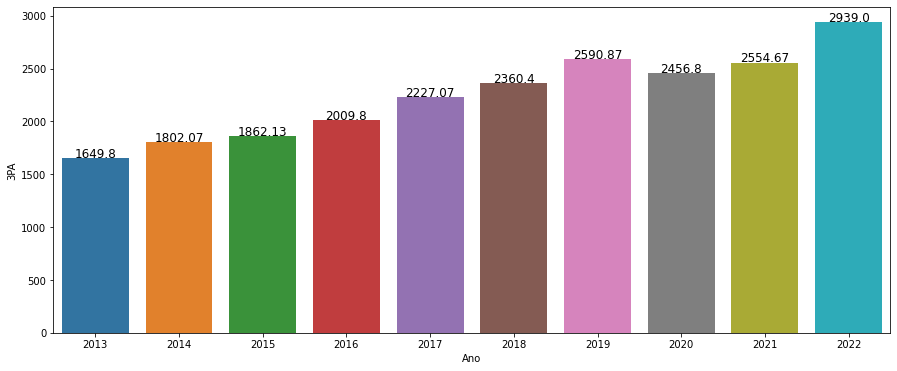

In [ ]:
plt.figure(figsize=(15, 6))
plot = sns.barplot(data=df_13_22, x="Ano", y="3PA", ci=None)
for i in plot.patches:
  plot.annotate(i.get_height().round(2),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center',
                va='baseline',
                fontsize=12,
                color='black',
                xytext=(0, 1),
                textcoords='offset points')  

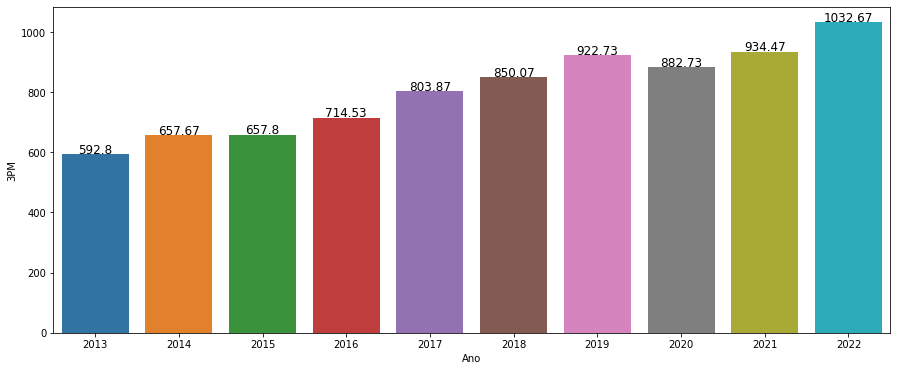

In [ ]:
plt.figure(figsize=(15, 6))
plot = sns.barplot(data=df_13_22, x="Ano", y="3PM", ci=None)
for i in plot.patches:
  plot.annotate(i.get_height().round(2),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center',
                va='baseline',
                fontsize=12,
                color='black',
                xytext=(0, 1),
                textcoords='offset points')  

Ao analisarmos a variável ‘3P%’, estranhamos ao verificar que o Sacramento tinha números muito parecidos com os dos sextos colocadas. Mas ao checar também as variáveis ‘3PA’ e ‘3PM’, tudo ficou claro. **Sacramento possui um bom aproveitamento percentual das bolas de 3, porém, tenta menos que os adversários. Se tenta menos, consequentemente acertará menos.** Bingo! A bola de 3 tem sim a relevância que imaginávamos. 

- Variável ‘BLKA’

‘BLKA’ mostra a quantidade de arremessos bloqueados e possui uma expressiva correlação negativa com o nosso target. Ou seja, times que vão para os Playoffs precisam ter menos arremessos bloqueados do que os adversários.

O comparativo ano a ano até mostrou uma evolução do Sacramento nesta variável, **mas ainda é algo que precisa melhorar**.

- Variáveis ‘DREB’ e ‘REB’.

‘DREB’ mostra a quantidade de rebotes defensivos (quando um jogador consegue pegar a bola depois de um arremesso feito por um adversário) e ‘REB’ mostra o total de rebotes (defensivos e ofensivos).

Falamos anteriormente que, dentre as hipóteses que levantamos, a única que talvez ainda pudesse ser comprovada era a em relação a ‘DREB’. Afinal, os gráficos mostraram que os Kings tiveram nesta variável um desempenho abaixo dos sextos colocados em todas as temporadas. 

Ao observarmos ‘REB’, em somente uma das últimas 10 temporadas o Sacramento teve números melhores do que o sexto colocado.

Sendo assim, aparentemente, **os rebotes têm um peso sobre a não ida dos Kings para os Playoffs. São aspectos que a franquia precisa melhorar**. 

#Modelagem

Visto que o problema de negócio é identificar o que é necessário para separar duas categorias (times que vão e os que não vão para os playoffs), entendemos que a **técnica de Machine Learning de Classificação** seja a mais adequada.

Faremos testes com as técnicas Regressão Logística, Árvore de Decisão e Random Forest.

In [ ]:
df_13_22.to_csv('df_13_22.csv', index= False)

In [ ]:
#Importando as bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Regressão Logística

##Funções

Primeiramente, vamos criar as funções que usaremos durante os testes de modelagem. 

In [ ]:
#FUNÇÃO PARA DESCOBRIR O MELHOR THREHOLD
def best_threshold(features):
  #Split Treino/teste
  X = df_13_22[features]
  y = df_13_22['Playoffs']
  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.33, 
                                                    stratify=y,
                                                    random_state = 42)

  lr = LogisticRegression()

  lr.fit(X_train, y_train)

  y_pred_proba = lr.predict_proba(X_test)[:,1]

  best_f1 = 0
  best_threshold = 0
  for i in range(5, 8):
    y_pred = (y_pred_proba >= i/10).astype(int)
    f1 = metrics.f1_score(y_test, y_pred).round(2)
    if f1 >= best_f1:
      best_threshold = i/10
      best_f1 = f1

  print(f'best_f1: {best_f1}')
  print(f'best_threshold: {best_threshold}')


#FUNÇÃO PARA CONFERIR AS MÉTRICAS
def metricas(features, threshold):
  #Split Treino/teste
  X = df_13_22[features]
  y = df_13_22['Playoffs']
  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.33, 
                                                    stratify=y,
                                                    random_state = 42)

  lr = LogisticRegression()

  lr.fit(X_train, y_train)

  y_pred_proba = lr.predict_proba(X_test)[:,1]
  
  y_pred = (y_pred_proba >= threshold).astype(int)
  metricas = {}
  metricas['name'] = features
  metricas["precision"] = precision_score(y_test, y_pred, pos_label=1).round(2)
  metricas["recall"] = recall_score(y_test, y_pred, pos_label=1).round(2)
  metricas["f1_score"] = metrics.f1_score(y_test, y_pred, pos_label=1).round(2)
  return metricas

#FUNÇÃO PARA CRIAR UMA TABELA PARA FAZER OS COMPARATIVOS
def tabela(dataframe, modelo):
  return pd.concat([dataframe, pd.DataFrame([modelo])]).sort_values("f1_score", ascending=False)

#FUNÇÃO PARA CRIAR A MATRIZ DE CONFUSÃO
def matriz_confusao(features,threshold):
  #Split Treino/teste
  X = df_13_22[features]
  y = df_13_22['Playoffs']
  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.33, 
                                                    stratify=y,
                                                    random_state = 42)

  lr = LogisticRegression()

  lr.fit(X_train, y_train)

  y_pred_proba = lr.predict_proba(X_test)[:,1]
  ConfusionMatrixDisplay.from_predictions(y_test, (y_pred_proba >= threshold).astype(int), cmap="Blues")
  plt.grid(False)

**Observação 01**: optamos por não usar a variável ‘W’ (número de vitórias) em nenhum modelo, já que criaria um overfitting. Afinal, como mencionamos anteriormente, o raciocínio é muito óbvio: quanto mais vitórias, maior a chance do time ir para os playoffs. Se incluíssemos ‘W’, com certeza teríamos excelentes métricas, mas que nem de longe responderiam o nosso problema de negócio. 

**Observação 02**: na função que checa qual o melhor threshold, optamos por verificar apenas thresholds entre 0.5 e 0.7, para desta forma evitar os erros do tipo “Falso Positivo”, que seria dizer que o time vai para os playoffs, quando na verdade não vai.

A seguir iremos fazer uma série de testes, criando modelos com quantidade e tipos diferentes de variáveis. Após o término dos testes, iremos fazer as considerações. 

##Modelo 1 ('FG%', '3P%', 'DREB', 'PTS', 'BLK')

O primeiro passo é descobrir qual o melhor threshold com esta combinação de variáveis.

In [ ]:
best_threshold(['FG%', '3P%', 'DREB', 'PTS', 'BLK'])

best_f1: 0.33
best_threshold: 0.5


Em seguida, checar as métricas com o melhor threshold identificado.

In [ ]:
modelo01 = metricas(['FG%', '3P%', 'DREB', 'PTS', 'BLK'], 0.5)
modelo01

{'name': ['FG%', '3P%', 'DREB', 'PTS', 'BLK'],
 'precision': 0.38,
 'recall': 0.3,
 'f1_score': 0.33}

Agora iremos criar um dataframe, que irá mostrar os dados de todos os modelos que serão criados. Determinamos através da função, que a ordem dos modelos na tabela será de acordo com o F1 Score.

In [ ]:
comparativo = pd.DataFrame()
comparativo = tabela(comparativo, modelo01)
comparativo

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS, BLK]",0.38,0.3,0.33


Por último, iremos dar uma olhada na Matriz de Confusão.

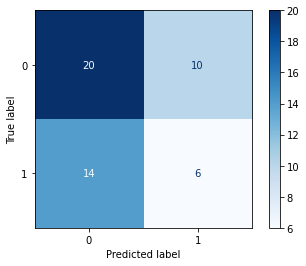

In [ ]:
matriz_confusao(['FG%', '3P%', 'DREB', 'PTS', 'BLK'], 0.5)

Todos os testes abaixo seguirão este mesmo raciocínio.

##Modelo 2 ('FG%', '3P%', 'DREB', 'PTS')

In [ ]:
best_threshold(['FG%', '3P%', 'DREB', 'PTS'])

best_f1: 0.28
best_threshold: 0.5


In [ ]:
modelo02 = metricas(['FG%', '3P%', 'DREB', 'PTS'], 0.5)
modelo02

{'name': ['FG%', '3P%', 'DREB', 'PTS'],
 'precision': 0.31,
 'recall': 0.25,
 'f1_score': 0.28}

In [ ]:
comparativo = tabela(comparativo, modelo02)
comparativo

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS, BLK]",0.38,0.30,0.33
0,"[FG%, 3P%, DREB, PTS]",0.31,0.25,0.28


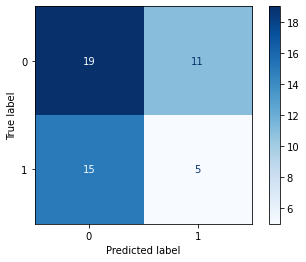

In [ ]:
matriz_confusao(['FG%', '3P%', 'DREB', 'PTS'], 0.5)

##Modelo 3 ('FG%', '3P%', 'DREB')

In [ ]:
best_threshold(['FG%', '3P%', 'DREB'])

best_f1: 0.37
best_threshold: 0.5


In [ ]:
modelo03 = metricas(['FG%', '3P%', 'DREB'], 0.5)
modelo03

{'name': ['FG%', '3P%', 'DREB'],
 'precision': 0.5,
 'recall': 0.3,
 'f1_score': 0.37}

In [ ]:
comparativo = tabela(comparativo, modelo03)
comparativo

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB]",0.50,0.30,0.37
0,"[FG%, 3P%, DREB, PTS, BLK]",0.38,0.30,0.33
0,"[FG%, 3P%, DREB, PTS]",0.31,0.25,0.28


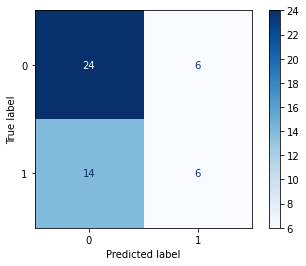

In [ ]:
matriz_confusao(['FG%', '3P%', 'DREB'], 0.5)

##Modelo 4 ('FG%', '3P%')

In [ ]:
best_threshold(['FG%', '3P%'])

best_f1: 0.67
best_threshold: 0.5


In [ ]:
modelo04 =  metricas(['FG%', '3P%'], 0.5)
modelo04

{'name': ['FG%', '3P%'], 'precision': 0.75, 'recall': 0.6, 'f1_score': 0.67}

In [ ]:
comparativo = tabela(comparativo, modelo04)
comparativo

,name,precision,recall,f1_score
0,"[FG%, 3P%]",0.75,0.60,0.67
0,"[FG%, 3P%, DREB]",0.50,0.30,0.37
0,"[FG%, 3P%, DREB, PTS, BLK]",0.38,0.30,0.33
0,"[FG%, 3P%, DREB, PTS]",0.31,0.25,0.28


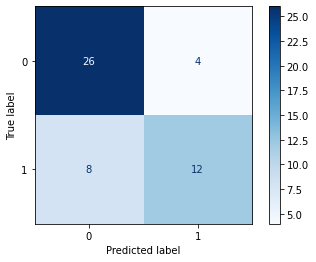

In [ ]:
matriz_confusao(['FG%', '3P%'], 0.5)

##Modelo 5 ('3P%')

In [ ]:
best_threshold(['3P%'])

best_f1: 0.44
best_threshold: 0.5


In [ ]:
modelo05 = metricas(['3P%'], 0.5)
modelo05

{'name': ['3P%'], 'precision': 0.58, 'recall': 0.35, 'f1_score': 0.44}

In [ ]:
comparativo = tabela(comparativo, modelo05)
comparativo

,name,precision,recall,f1_score
0,"[FG%, 3P%]",0.75,0.60,0.67
0,[3P%],0.58,0.35,0.44
0,"[FG%, 3P%, DREB]",0.50,0.30,0.37
0,"[FG%, 3P%, DREB, PTS, BLK]",0.38,0.30,0.33
0,"[FG%, 3P%, DREB, PTS]",0.31,0.25,0.28


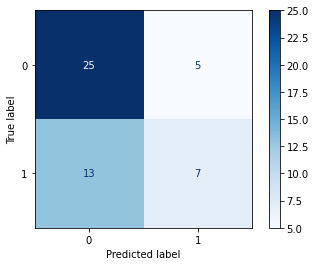

In [ ]:
matriz_confusao(['3P%'], 0.5)

##Modelo 6 ('3PA', '3PM')

In [ ]:
best_threshold(['3PA', '3PM'])

best_f1: 0.44
best_threshold: 0.5


In [ ]:
modelo06 = metricas(['3PA', '3PM'], 0.5)
modelo06

{'name': ['3PA', '3PM'], 'precision': 0.58, 'recall': 0.35, 'f1_score': 0.44}

In [ ]:
comparativo = tabela(comparativo, modelo06)
comparativo

,name,precision,recall,f1_score
0,"[FG%, 3P%]",0.75,0.60,0.67
0,[3P%],0.58,0.35,0.44
0,"[3PA, 3PM]",0.58,0.35,0.44
0,"[FG%, 3P%, DREB]",0.50,0.30,0.37
0,"[FG%, 3P%, DREB, PTS, BLK]",0.38,0.30,0.33
0,"[FG%, 3P%, DREB, PTS]",0.31,0.25,0.28


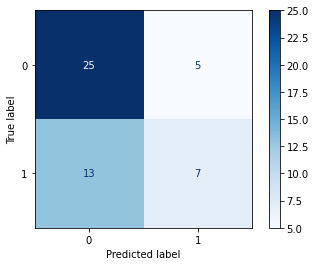

In [ ]:
matriz_confusao(['3PA', '3PM'], 0.5)

##Modelo 7 ('3P%', '3PA', '3PM')

In [ ]:
best_threshold(['3P%', '3PA', '3PM'])

best_f1: 0.44
best_threshold: 0.5


In [ ]:
modelo07 = metricas(['3P%', '3PA', '3PM'], 0.5)
modelo07

{'name': ['3P%', '3PA', '3PM'],
 'precision': 0.58,
 'recall': 0.35,
 'f1_score': 0.44}

In [ ]:
comparativo = tabela(comparativo, modelo07)
comparativo

,name,precision,recall,f1_score
0,"[FG%, 3P%]",0.75,0.60,0.67
0,[3P%],0.58,0.35,0.44
0,"[3PA, 3PM]",0.58,0.35,0.44
0,"[3P%, 3PA, 3PM]",0.58,0.35,0.44
0,"[FG%, 3P%, DREB]",0.50,0.30,0.37
0,"[FG%, 3P%, DREB, PTS, BLK]",0.38,0.30,0.33
0,"[FG%, 3P%, DREB, PTS]",0.31,0.25,0.28


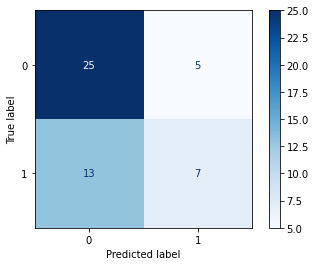

In [ ]:
matriz_confusao(['3P%', '3PA', '3PM'], 0.5)

##Modelo 8 ('FG%', '3P%', '3PA', '3PM')

In [ ]:
best_threshold(['FG%', '3P%', '3PA', '3PM'])

best_f1: 0.56
best_threshold: 0.5


In [ ]:
modelo08 = metricas(['FG%', '3P%', '3PA', '3PM'], 0.5)
modelo08

{'name': ['FG%', '3P%', '3PA', '3PM'],
 'precision': 0.62,
 'recall': 0.5,
 'f1_score': 0.56}

In [ ]:
comparativo = tabela(comparativo, modelo08)
comparativo

,name,precision,recall,f1_score
0,"[FG%, 3P%]",0.75,0.60,0.67
0,"[FG%, 3P%, 3PA, 3PM]",0.62,0.50,0.56
0,[3P%],0.58,0.35,0.44
0,"[3PA, 3PM]",0.58,0.35,0.44
0,"[3P%, 3PA, 3PM]",0.58,0.35,0.44
0,"[FG%, 3P%, DREB]",0.50,0.30,0.37
0,"[FG%, 3P%, DREB, PTS, BLK]",0.38,0.30,0.33
0,"[FG%, 3P%, DREB, PTS]",0.31,0.25,0.28


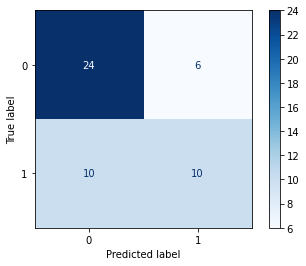

In [ ]:
matriz_confusao(['FG%', '3P%', '3PA', '3PM'], 0.5)

##Modelo 9 ('BLKA')

In [ ]:
best_threshold(['BLKA'])

best_f1: 0.53
best_threshold: 0.5


In [ ]:
modelo09 = metricas(['BLKA'], 0.5)
modelo09

{'name': ['BLKA'], 'precision': 0.56, 'recall': 0.5, 'f1_score': 0.53}

In [ ]:
comparativo = tabela(comparativo, modelo09)
comparativo

,name,precision,recall,f1_score
0,"[FG%, 3P%]",0.75,0.60,0.67
0,"[FG%, 3P%, 3PA, 3PM]",0.62,0.50,0.56
0,[BLKA],0.56,0.50,0.53
0,[3P%],0.58,0.35,0.44
0,"[3PA, 3PM]",0.58,0.35,0.44
0,"[3P%, 3PA, 3PM]",0.58,0.35,0.44
0,"[FG%, 3P%, DREB]",0.50,0.30,0.37
0,"[FG%, 3P%, DREB, PTS, BLK]",0.38,0.30,0.33
0,"[FG%, 3P%, DREB, PTS]",0.31,0.25,0.28


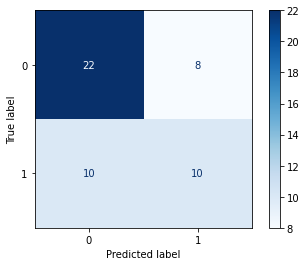

In [ ]:
matriz_confusao(['BLKA'], 0.5)

##Modelo 10 ('DREB', 'REB')

In [ ]:
best_threshold(['DREB', 'REB'])

best_f1: 0.47
best_threshold: 0.5


In [ ]:
modelo10 = metricas(['DREB', 'REB'], 0.5)
modelo10

{'name': ['DREB', 'REB'], 'precision': 0.43, 'recall': 0.5, 'f1_score': 0.47}

In [ ]:
comparativo = tabela(comparativo, modelo10)
comparativo

,name,precision,recall,f1_score
0,"[FG%, 3P%]",0.75,0.60,0.67
0,"[FG%, 3P%, 3PA, 3PM]",0.62,0.50,0.56
0,[BLKA],0.56,0.50,0.53
0,"[DREB, REB]",0.43,0.50,0.47
0,[3P%],0.58,0.35,0.44
0,"[3PA, 3PM]",0.58,0.35,0.44
0,"[3P%, 3PA, 3PM]",0.58,0.35,0.44
0,"[FG%, 3P%, DREB]",0.50,0.30,0.37
0,"[FG%, 3P%, DREB, PTS, BLK]",0.38,0.30,0.33
0,"[FG%, 3P%, DREB, PTS]",0.31,0.25,0.28


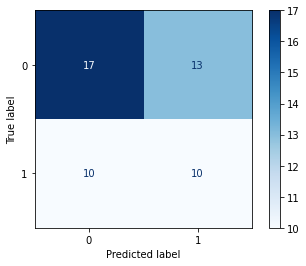

In [ ]:
matriz_confusao(['DREB', 'REB'], 0.5)

##Modelo 11 ('BLKA', 'DREB', 'REB')

In [ ]:
best_threshold(['BLKA', 'DREB', 'REB'])

best_f1: 0.67
best_threshold: 0.5


In [ ]:
modelo11 = metricas(['BLKA', 'DREB', 'REB'], 0.5)
modelo11

{'name': ['BLKA', 'DREB', 'REB'],
 'precision': 0.6,
 'recall': 0.75,
 'f1_score': 0.67}

In [ ]:
comparativo = tabela(comparativo, modelo11)
comparativo

,name,precision,recall,f1_score
0,"[FG%, 3P%]",0.75,0.60,0.67
0,"[BLKA, DREB, REB]",0.60,0.75,0.67
0,"[FG%, 3P%, 3PA, 3PM]",0.62,0.50,0.56
0,[BLKA],0.56,0.50,0.53
0,"[DREB, REB]",0.43,0.50,0.47
0,[3P%],0.58,0.35,0.44
0,"[3PA, 3PM]",0.58,0.35,0.44
0,"[3P%, 3PA, 3PM]",0.58,0.35,0.44
0,"[FG%, 3P%, DREB]",0.50,0.30,0.37
0,"[FG%, 3P%, DREB, PTS, BLK]",0.38,0.30,0.33


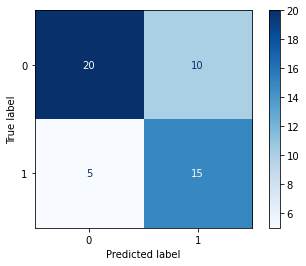

In [ ]:
matriz_confusao(['BLKA', 'DREB', 'REB'], 0.5)

##Modelo 12 ('FG%', '3P%', 'BLKA', 'DREB', 'REB')

In [ ]:
best_threshold(['FG%', '3P%', 'BLKA', 'DREB', 'REB'])

best_f1: 0.6
best_threshold: 0.5


In [ ]:
modelo12 = metricas(['FG%', '3P%', 'BLKA', 'DREB', 'REB'], 0.5)
modelo12

{'name': ['FG%', '3P%', 'BLKA', 'DREB', 'REB'],
 'precision': 0.57,
 'recall': 0.65,
 'f1_score': 0.6}

In [ ]:
comparativo = tabela(comparativo, modelo12)
comparativo

,name,precision,recall,f1_score
0,"[FG%, 3P%]",0.75,0.60,0.67
0,"[BLKA, DREB, REB]",0.60,0.75,0.67
0,"[FG%, 3P%, BLKA, DREB, REB]",0.57,0.65,0.60
0,"[FG%, 3P%, 3PA, 3PM]",0.62,0.50,0.56
0,[BLKA],0.56,0.50,0.53
0,"[DREB, REB]",0.43,0.50,0.47
0,[3P%],0.58,0.35,0.44
0,"[3PA, 3PM]",0.58,0.35,0.44
0,"[3P%, 3PA, 3PM]",0.58,0.35,0.44
0,"[FG%, 3P%, DREB]",0.50,0.30,0.37


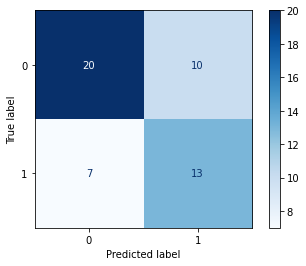

In [ ]:
matriz_confusao(['FG%', '3P%', 'BLKA', 'DREB', 'REB'], 0.5)

##Modelo 13 ('FG%', '3P%', 'BLKA', 'DREB')

In [ ]:
best_threshold(['FG%', '3P%', 'BLKA', 'DREB'])

best_f1: 0.63
best_threshold: 0.5


In [ ]:
modelo13 = metricas(['FG%', '3P%', 'BLKA', 'DREB'], 0.5)
modelo13

{'name': ['FG%', '3P%', 'BLKA', 'DREB'],
 'precision': 0.62,
 'recall': 0.65,
 'f1_score': 0.63}

In [ ]:
comparativo = tabela(comparativo, modelo13)
comparativo

,name,precision,recall,f1_score
0,"[FG%, 3P%]",0.75,0.60,0.67
0,"[BLKA, DREB, REB]",0.60,0.75,0.67
0,"[FG%, 3P%, BLKA, DREB]",0.62,0.65,0.63
0,"[FG%, 3P%, BLKA, DREB, REB]",0.57,0.65,0.60
0,"[FG%, 3P%, 3PA, 3PM]",0.62,0.50,0.56
0,[BLKA],0.56,0.50,0.53
0,"[DREB, REB]",0.43,0.50,0.47
0,[3P%],0.58,0.35,0.44
0,"[3PA, 3PM]",0.58,0.35,0.44
0,"[3P%, 3PA, 3PM]",0.58,0.35,0.44


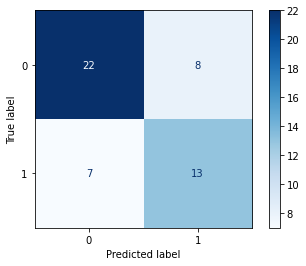

In [ ]:
matriz_confusao(['FG%', '3P%', 'BLKA', 'DREB'], 0.5)

##Modelo 14 ('FG%', '3P%', 'BLKA')

In [ ]:
best_threshold(['FG%', '3P%', 'BLKA'])

best_f1: 0.74
best_threshold: 0.5


In [ ]:
modelo14 = metricas(['FG%', '3P%', 'BLKA'], 0.5)
modelo14

{'name': ['FG%', '3P%', 'BLKA'],
 'precision': 0.87,
 'recall': 0.65,
 'f1_score': 0.74}

In [ ]:
comparativo = tabela(comparativo, modelo14)
comparativo

,name,precision,recall,f1_score
0,"[FG%, 3P%, BLKA]",0.87,0.65,0.74
0,"[FG%, 3P%]",0.75,0.60,0.67
0,"[BLKA, DREB, REB]",0.60,0.75,0.67
0,"[FG%, 3P%, BLKA, DREB]",0.62,0.65,0.63
0,"[FG%, 3P%, BLKA, DREB, REB]",0.57,0.65,0.60
0,"[FG%, 3P%, 3PA, 3PM]",0.62,0.50,0.56
0,[BLKA],0.56,0.50,0.53
0,"[DREB, REB]",0.43,0.50,0.47
0,[3P%],0.58,0.35,0.44
0,"[3PA, 3PM]",0.58,0.35,0.44


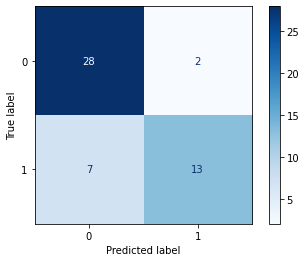

In [ ]:
matriz_confusao(['FG%', '3P%', 'BLKA'], 0.5)

##Modelo 15 ('FG%', '3P%', 'DREB')

In [ ]:
best_threshold(['FG%', '3P%', 'DREB'])

best_f1: 0.37
best_threshold: 0.5


In [ ]:
modelo15 = metricas(['FG%', '3P%', 'DREB'], 0.5)
modelo15

{'name': ['FG%', '3P%', 'DREB'],
 'precision': 0.5,
 'recall': 0.3,
 'f1_score': 0.37}

In [ ]:
comparativo = tabela(comparativo, modelo15)
comparativo

,name,precision,recall,f1_score
0,"[FG%, 3P%, BLKA]",0.87,0.65,0.74
0,"[FG%, 3P%]",0.75,0.60,0.67
0,"[BLKA, DREB, REB]",0.60,0.75,0.67
0,"[FG%, 3P%, BLKA, DREB]",0.62,0.65,0.63
0,"[FG%, 3P%, BLKA, DREB, REB]",0.57,0.65,0.60
0,"[FG%, 3P%, 3PA, 3PM]",0.62,0.50,0.56
0,[BLKA],0.56,0.50,0.53
0,"[DREB, REB]",0.43,0.50,0.47
0,[3P%],0.58,0.35,0.44
0,"[3PA, 3PM]",0.58,0.35,0.44


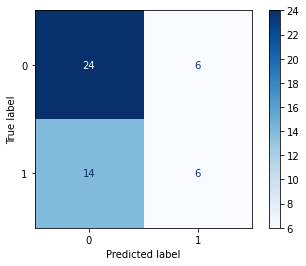

In [ ]:
matriz_confusao(['FG%', '3P%', 'DREB'], 0.5)

##Modelo 16 ('FG%', 'BLKA', 'DREB')

In [ ]:
best_threshold(['FG%', 'BLKA', 'DREB'])

best_f1: 0.62
best_threshold: 0.5


In [ ]:
modelo16 = metricas(['FG%', 'BLKA', 'DREB'], 0.5)
modelo16

{'name': ['FG%', 'BLKA', 'DREB'],
 'precision': 0.59,
 'recall': 0.65,
 'f1_score': 0.62}

In [ ]:
comparativo = tabela(comparativo, modelo16)
comparativo

,name,precision,recall,f1_score
0,"[FG%, 3P%, BLKA]",0.87,0.65,0.74
0,"[FG%, 3P%]",0.75,0.60,0.67
0,"[BLKA, DREB, REB]",0.60,0.75,0.67
0,"[FG%, 3P%, BLKA, DREB]",0.62,0.65,0.63
0,"[FG%, BLKA, DREB]",0.59,0.65,0.62
0,"[FG%, 3P%, BLKA, DREB, REB]",0.57,0.65,0.60
0,"[FG%, 3P%, 3PA, 3PM]",0.62,0.50,0.56
0,[BLKA],0.56,0.50,0.53
0,"[DREB, REB]",0.43,0.50,0.47
0,[3P%],0.58,0.35,0.44


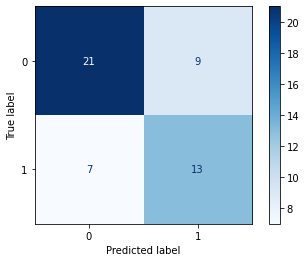

In [ ]:
matriz_confusao(['FG%', 'BLKA', 'DREB'], 0.5)

##Modelo 17 ('3P%', 'BLKA', 'DREB')

In [ ]:
best_threshold(['3P%', 'BLKA', 'DREB'])

best_f1: 0.56
best_threshold: 0.5


In [ ]:
modelo17 = metricas(['3P%', 'BLKA', 'DREB'], 0.5)
modelo17

{'name': ['3P%', 'BLKA', 'DREB'],
 'precision': 0.52,
 'recall': 0.6,
 'f1_score': 0.56}

In [ ]:
comparativo = tabela(comparativo, modelo17)
comparativo

,name,precision,recall,f1_score
0,"[FG%, 3P%, BLKA]",0.87,0.65,0.74
0,"[FG%, 3P%]",0.75,0.60,0.67
0,"[BLKA, DREB, REB]",0.60,0.75,0.67
0,"[FG%, 3P%, BLKA, DREB]",0.62,0.65,0.63
0,"[FG%, BLKA, DREB]",0.59,0.65,0.62
0,"[FG%, 3P%, BLKA, DREB, REB]",0.57,0.65,0.60
0,"[3P%, BLKA, DREB]",0.52,0.60,0.56
0,"[FG%, 3P%, 3PA, 3PM]",0.62,0.50,0.56
0,[BLKA],0.56,0.50,0.53
0,"[DREB, REB]",0.43,0.50,0.47


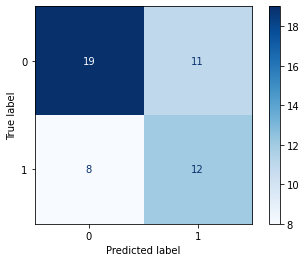

In [ ]:
matriz_confusao(['3P%', 'BLKA', 'DREB'], 0.5)

##Modelo 18 ('FG%', '3P%', '3PA', '3PM', 'BLKA', 'DREB')

In [ ]:
best_threshold(['FG%', '3P%', '3PA', '3PM', 'BLKA', 'DREB'])

best_f1: 0.67
best_threshold: 0.5


In [ ]:
modelo18 = metricas(['FG%', '3P%', '3PA', '3PM', 'BLKA', 'DREB'], 0.5)
modelo18

{'name': ['FG%', '3P%', '3PA', '3PM', 'BLKA', 'DREB'],
 'precision': 0.64,
 'recall': 0.7,
 'f1_score': 0.67}

In [ ]:
comparativo = tabela(comparativo, modelo18)
comparativo

,name,precision,recall,f1_score
0,"[FG%, 3P%, BLKA]",0.87,0.65,0.74
0,"[FG%, 3P%]",0.75,0.60,0.67
0,"[FG%, 3P%, 3PA, 3PM, BLKA, DREB]",0.64,0.70,0.67
0,"[BLKA, DREB, REB]",0.60,0.75,0.67
0,"[FG%, 3P%, BLKA, DREB]",0.62,0.65,0.63
0,"[FG%, BLKA, DREB]",0.59,0.65,0.62
0,"[FG%, 3P%, BLKA, DREB, REB]",0.57,0.65,0.60
0,"[3P%, BLKA, DREB]",0.52,0.60,0.56
0,"[FG%, 3P%, 3PA, 3PM]",0.62,0.50,0.56
0,[BLKA],0.56,0.50,0.53


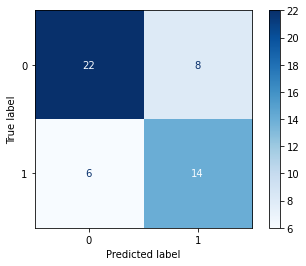

In [ ]:
matriz_confusao(['FG%', '3P%', '3PA', '3PM', 'BLKA', 'DREB'], 0.5)

##Modelo 19 ('FG%', '3P%', '3PM', 'BLKA', 'DREB')

In [ ]:
best_threshold(['FG%', '3P%', '3PM', 'BLKA', 'DREB'])

best_f1: 0.59
best_threshold: 0.5


In [ ]:
modelo19 = metricas(['FG%', '3P%', '3PM', 'BLKA', 'DREB'], 0.5)
modelo19

{'name': ['FG%', '3P%', '3PM', 'BLKA', 'DREB'],
 'precision': 0.54,
 'recall': 0.65,
 'f1_score': 0.59}

In [ ]:
comparativo = tabela(comparativo, modelo19)
comparativo

,name,precision,recall,f1_score
0,"[FG%, 3P%, BLKA]",0.87,0.65,0.74
0,"[FG%, 3P%]",0.75,0.60,0.67
0,"[FG%, 3P%, 3PA, 3PM, BLKA, DREB]",0.64,0.70,0.67
0,"[BLKA, DREB, REB]",0.60,0.75,0.67
0,"[FG%, 3P%, BLKA, DREB]",0.62,0.65,0.63
0,"[FG%, BLKA, DREB]",0.59,0.65,0.62
0,"[FG%, 3P%, BLKA, DREB, REB]",0.57,0.65,0.60
0,"[FG%, 3P%, 3PM, BLKA, DREB]",0.54,0.65,0.59
0,"[FG%, 3P%, 3PA, 3PM]",0.62,0.50,0.56
0,"[3P%, BLKA, DREB]",0.52,0.60,0.56


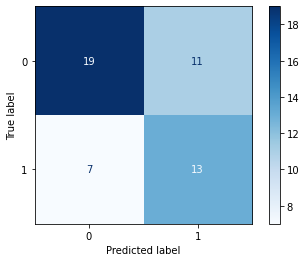

In [ ]:
matriz_confusao(['FG%', '3P%', '3PM', 'BLKA', 'DREB'], 0.5)

##Modelo 20 ('FG%', '3P%', '3PA', 'BLKA', 'DREB')

In [ ]:
best_threshold(['FG%', '3P%', '3PA', 'BLKA', 'DREB'])

best_f1: 0.59
best_threshold: 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
modelo20 = metricas(['FG%', '3P%', '3PA', 'BLKA', 'DREB'], 0.5)
modelo20

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'name': ['FG%', '3P%', '3PA', 'BLKA', 'DREB'],
 'precision': 0.54,
 'recall': 0.65,
 'f1_score': 0.59}

In [ ]:
comparativo = tabela(comparativo, modelo20)
comparativo

,name,precision,recall,f1_score
0,"[FG%, 3P%, BLKA]",0.87,0.65,0.74
0,"[FG%, 3P%]",0.75,0.60,0.67
0,"[FG%, 3P%, 3PA, 3PM, BLKA, DREB]",0.64,0.70,0.67
0,"[BLKA, DREB, REB]",0.60,0.75,0.67
0,"[FG%, 3P%, BLKA, DREB]",0.62,0.65,0.63
0,"[FG%, BLKA, DREB]",0.59,0.65,0.62
0,"[FG%, 3P%, BLKA, DREB, REB]",0.57,0.65,0.60
0,"[FG%, 3P%, 3PA, BLKA, DREB]",0.54,0.65,0.59
0,"[FG%, 3P%, 3PM, BLKA, DREB]",0.54,0.65,0.59
0,"[FG%, 3P%, 3PA, 3PM]",0.62,0.50,0.56


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


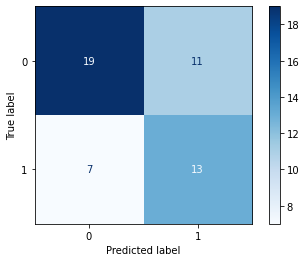

In [ ]:
matriz_confusao(['FG%', '3P%', '3PA', 'BLKA', 'DREB'], 0.5)

#Árvore de Decisão

Nesta técnica, vamos testar os mesmos 20 modelos, sendo que em todos eles optamos por deixar os parâmetros default da Árvore de Decisão, exceto “max_depth”, que colocaremos 5. Ao final, iremos selecionar os modelos com os maiores F1 Score e fazer um GridSearch em cada um para tentar aperfeiçoá-los. 

##Função

In [ ]:
#FUNÇÃO PARA CONFERIR AS MÉTRICAS
def metricas_ArvDec(features):
  X = df_13_22[features]
  y = df_13_22['Playoffs']
  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.33, 
                                                    stratify=y,
                                                    random_state = 42)
  
  arvDecisao = DecisionTreeClassifier(random_state=42, max_depth=5)

  arvDecisao.fit(X_train, y_train)

  y_pred = arvDecisao.predict(X_test)

  metricas = {}
  metricas['name'] = features
  metricas["precision"] = metrics.precision_score(y_test, y_pred).round(2)
  metricas["recall"] = metrics.recall_score(y_test, y_pred).round(2)
  metricas["f1_score"] = metrics.f1_score(y_test, y_pred).round(2)
  return metricas

##Modelo 1 ('FG%', '3P%', 'DREB', 'PTS', 'BLK')

In [ ]:
modelo01_AD = metricas_ArvDec(['FG%', '3P%', 'DREB', 'PTS', 'BLK'])
modelo01_AD

{'name': ['FG%', '3P%', 'DREB', 'PTS', 'BLK'],
 'precision': 0.57,
 'recall': 0.65,
 'f1_score': 0.6}

In [ ]:
comparativo_arv = pd.DataFrame()
comparativo_arv = tabela(comparativo_arv, modelo01_AD)
comparativo_arv

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS, BLK]",0.57,0.65,0.6


##Modelo 2 ('FG%', '3P%', 'DREB', 'PTS')

In [ ]:
modelo02_AD = metricas_ArvDec(['FG%', '3P%', 'DREB', 'PTS'])
modelo02_AD

{'name': ['FG%', '3P%', 'DREB', 'PTS'],
 'precision': 0.78,
 'recall': 0.7,
 'f1_score': 0.74}

In [ ]:
comparativo_arv = tabela(comparativo_arv, modelo02_AD)
comparativo_arv

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.78,0.70,0.74
0,"[FG%, 3P%, DREB, PTS, BLK]",0.57,0.65,0.60


##Modelo 3 ('FG%', '3P%', 'DREB')

In [ ]:
modelo03_AD = metricas_ArvDec(['FG%', '3P%', 'DREB'])
modelo03_AD

{'name': ['FG%', '3P%', 'DREB'],
 'precision': 0.71,
 'recall': 0.6,
 'f1_score': 0.65}

In [ ]:
comparativo_arv = tabela(comparativo_arv, modelo03_AD)
comparativo_arv

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.78,0.70,0.74
0,"[FG%, 3P%, DREB]",0.71,0.60,0.65
0,"[FG%, 3P%, DREB, PTS, BLK]",0.57,0.65,0.60


##Modelo 4 ('FG%', '3P%')

In [ ]:
modelo04_AD = metricas_ArvDec(['FG%', '3P%'])
modelo04_AD

{'name': ['FG%', '3P%'], 'precision': 0.69, 'recall': 0.45, 'f1_score': 0.55}

In [ ]:
comparativo_arv = tabela(comparativo_arv, modelo04_AD)
comparativo_arv

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.78,0.70,0.74
0,"[FG%, 3P%, DREB]",0.71,0.60,0.65
0,"[FG%, 3P%, DREB, PTS, BLK]",0.57,0.65,0.60
0,"[FG%, 3P%]",0.69,0.45,0.55


##Modelo 5 ('3P%')

In [ ]:
modelo05_AD = metricas_ArvDec(['3P%'])
modelo05_AD

{'name': ['3P%'], 'precision': 0.38, 'recall': 0.15, 'f1_score': 0.21}

In [ ]:
comparativo_arv = tabela(comparativo_arv, modelo05_AD)
comparativo_arv

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.78,0.70,0.74
0,"[FG%, 3P%, DREB]",0.71,0.60,0.65
0,"[FG%, 3P%, DREB, PTS, BLK]",0.57,0.65,0.60
0,"[FG%, 3P%]",0.69,0.45,0.55
0,[3P%],0.38,0.15,0.21


##Modelo 6 ('3PA', '3PM')

In [ ]:
modelo06_AD = metricas_ArvDec(['3PA', '3PM'])
modelo06_AD

{'name': ['3PA', '3PM'], 'precision': 0.57, 'recall': 0.6, 'f1_score': 0.59}

In [ ]:
comparativo_arv = tabela(comparativo_arv, modelo06_AD)
comparativo_arv

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.78,0.70,0.74
0,"[FG%, 3P%, DREB]",0.71,0.60,0.65
0,"[FG%, 3P%, DREB, PTS, BLK]",0.57,0.65,0.60
0,"[3PA, 3PM]",0.57,0.60,0.59
0,"[FG%, 3P%]",0.69,0.45,0.55
0,[3P%],0.38,0.15,0.21


##Modelo 7 ('3P%', '3PA', '3PM')

In [ ]:
modelo07_AD = metricas_ArvDec(['3P%', '3PA', '3PM'])
modelo07_AD

{'name': ['3P%', '3PA', '3PM'],
 'precision': 0.62,
 'recall': 0.75,
 'f1_score': 0.68}

In [ ]:
comparativo_arv = tabela(comparativo_arv, modelo07_AD)
comparativo_arv

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.78,0.70,0.74
0,"[3P%, 3PA, 3PM]",0.62,0.75,0.68
0,"[FG%, 3P%, DREB]",0.71,0.60,0.65
0,"[FG%, 3P%, DREB, PTS, BLK]",0.57,0.65,0.60
0,"[3PA, 3PM]",0.57,0.60,0.59
0,"[FG%, 3P%]",0.69,0.45,0.55
0,[3P%],0.38,0.15,0.21


##Modelo 8 ('FG%', '3P%', '3PA', '3PM')

In [ ]:
modelo08_AD = metricas_ArvDec(['FG%', '3P%', '3PA', '3PM'])
modelo08_AD

{'name': ['FG%', '3P%', '3PA', '3PM'],
 'precision': 0.62,
 'recall': 0.4,
 'f1_score': 0.48}

In [ ]:
comparativo_arv = tabela(comparativo_arv, modelo08_AD)
comparativo_arv

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.78,0.70,0.74
0,"[3P%, 3PA, 3PM]",0.62,0.75,0.68
0,"[FG%, 3P%, DREB]",0.71,0.60,0.65
0,"[FG%, 3P%, DREB, PTS, BLK]",0.57,0.65,0.60
0,"[3PA, 3PM]",0.57,0.60,0.59
0,"[FG%, 3P%]",0.69,0.45,0.55
0,"[FG%, 3P%, 3PA, 3PM]",0.62,0.40,0.48
0,[3P%],0.38,0.15,0.21


##Modelo 9 ('BLKA')

In [ ]:
modelo09_AD = metricas_ArvDec(['BLKA'])
modelo09_AD

{'name': ['BLKA'], 'precision': 0.44, 'recall': 0.35, 'f1_score': 0.39}

In [ ]:
comparativo_arv = tabela(comparativo_arv, modelo09_AD)
comparativo_arv

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.78,0.70,0.74
0,"[3P%, 3PA, 3PM]",0.62,0.75,0.68
0,"[FG%, 3P%, DREB]",0.71,0.60,0.65
0,"[FG%, 3P%, DREB, PTS, BLK]",0.57,0.65,0.60
0,"[3PA, 3PM]",0.57,0.60,0.59
0,"[FG%, 3P%]",0.69,0.45,0.55
0,"[FG%, 3P%, 3PA, 3PM]",0.62,0.40,0.48
0,[BLKA],0.44,0.35,0.39
0,[3P%],0.38,0.15,0.21


##Modelo 10 ('DREB', 'REB')

In [ ]:
modelo10_AD = metricas_ArvDec(['DREB', 'REB'])
modelo10_AD

{'name': ['DREB', 'REB'], 'precision': 0.52, 'recall': 0.65, 'f1_score': 0.58}

In [ ]:
comparativo_arv = tabela(comparativo_arv, modelo10_AD)
comparativo_arv

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.78,0.70,0.74
0,"[3P%, 3PA, 3PM]",0.62,0.75,0.68
0,"[FG%, 3P%, DREB]",0.71,0.60,0.65
0,"[FG%, 3P%, DREB, PTS, BLK]",0.57,0.65,0.60
0,"[3PA, 3PM]",0.57,0.60,0.59
0,"[DREB, REB]",0.52,0.65,0.58
0,"[FG%, 3P%]",0.69,0.45,0.55
0,"[FG%, 3P%, 3PA, 3PM]",0.62,0.40,0.48
0,[BLKA],0.44,0.35,0.39
0,[3P%],0.38,0.15,0.21


##Modelo 11 ('BLKA', 'DREB', 'REB')

In [ ]:
modelo11_AD = metricas_ArvDec(['BLKA', 'DREB', 'REB'])
modelo11_AD

{'name': ['BLKA', 'DREB', 'REB'],
 'precision': 0.61,
 'recall': 0.7,
 'f1_score': 0.65}

In [ ]:
comparativo_arv = tabela(comparativo_arv, modelo11_AD)
comparativo_arv

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.78,0.70,0.74
0,"[3P%, 3PA, 3PM]",0.62,0.75,0.68
0,"[FG%, 3P%, DREB]",0.71,0.60,0.65
0,"[BLKA, DREB, REB]",0.61,0.70,0.65
0,"[FG%, 3P%, DREB, PTS, BLK]",0.57,0.65,0.60
0,"[3PA, 3PM]",0.57,0.60,0.59
0,"[DREB, REB]",0.52,0.65,0.58
0,"[FG%, 3P%]",0.69,0.45,0.55
0,"[FG%, 3P%, 3PA, 3PM]",0.62,0.40,0.48
0,[BLKA],0.44,0.35,0.39


##Modelo 12 ('FG%', '3P%', 'BLKA', 'DREB', 'REB')

In [ ]:
modelo12_AD = metricas_ArvDec(['FG%', '3P%', 'BLKA', 'DREB', 'REB'])
modelo12_AD

{'name': ['FG%', '3P%', 'BLKA', 'DREB', 'REB'],
 'precision': 0.57,
 'recall': 0.65,
 'f1_score': 0.6}

In [ ]:
comparativo_arv = tabela(comparativo_arv, modelo12_AD)
comparativo_arv

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.78,0.70,0.74
0,"[3P%, 3PA, 3PM]",0.62,0.75,0.68
0,"[FG%, 3P%, DREB]",0.71,0.60,0.65
0,"[BLKA, DREB, REB]",0.61,0.70,0.65
0,"[FG%, 3P%, DREB, PTS, BLK]",0.57,0.65,0.60
0,"[FG%, 3P%, BLKA, DREB, REB]",0.57,0.65,0.60
0,"[3PA, 3PM]",0.57,0.60,0.59
0,"[DREB, REB]",0.52,0.65,0.58
0,"[FG%, 3P%]",0.69,0.45,0.55
0,"[FG%, 3P%, 3PA, 3PM]",0.62,0.40,0.48


##Modelo 13 ('FG%', '3P%', 'BLKA', 'DREB')

In [ ]:
modelo13_AD = metricas_ArvDec(['FG%', '3P%', 'BLKA', 'DREB'])
modelo13_AD

{'name': ['FG%', '3P%', 'BLKA', 'DREB'],
 'precision': 0.72,
 'recall': 0.65,
 'f1_score': 0.68}

In [ ]:
comparativo_arv = tabela(comparativo_arv, modelo13_AD)
comparativo_arv

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.78,0.70,0.74
0,"[3P%, 3PA, 3PM]",0.62,0.75,0.68
0,"[FG%, 3P%, BLKA, DREB]",0.72,0.65,0.68
0,"[FG%, 3P%, DREB]",0.71,0.60,0.65
0,"[BLKA, DREB, REB]",0.61,0.70,0.65
0,"[FG%, 3P%, DREB, PTS, BLK]",0.57,0.65,0.60
0,"[FG%, 3P%, BLKA, DREB, REB]",0.57,0.65,0.60
0,"[3PA, 3PM]",0.57,0.60,0.59
0,"[DREB, REB]",0.52,0.65,0.58
0,"[FG%, 3P%]",0.69,0.45,0.55


##Modelo 14 ('FG%', '3P%', 'BLKA')

In [ ]:
modelo14_AD = metricas_ArvDec(['FG%', '3P%', 'BLKA'])
modelo14_AD

{'name': ['FG%', '3P%', 'BLKA'],
 'precision': 0.56,
 'recall': 0.45,
 'f1_score': 0.5}

In [ ]:
comparativo_arv = tabela(comparativo_arv, modelo14_AD)
comparativo_arv

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.78,0.70,0.74
0,"[3P%, 3PA, 3PM]",0.62,0.75,0.68
0,"[FG%, 3P%, BLKA, DREB]",0.72,0.65,0.68
0,"[FG%, 3P%, DREB]",0.71,0.60,0.65
0,"[BLKA, DREB, REB]",0.61,0.70,0.65
0,"[FG%, 3P%, DREB, PTS, BLK]",0.57,0.65,0.60
0,"[FG%, 3P%, BLKA, DREB, REB]",0.57,0.65,0.60
0,"[3PA, 3PM]",0.57,0.60,0.59
0,"[DREB, REB]",0.52,0.65,0.58
0,"[FG%, 3P%]",0.69,0.45,0.55


##Modelo 15 ('FG%', '3P%', 'DREB')

In [ ]:
modelo15_AD = metricas_ArvDec(['FG%', '3P%', 'DREB'])
modelo15_AD

{'name': ['FG%', '3P%', 'DREB'],
 'precision': 0.71,
 'recall': 0.6,
 'f1_score': 0.65}

In [ ]:
comparativo_arv = tabela(comparativo_arv, modelo15_AD)
comparativo_arv

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.78,0.70,0.74
0,"[3P%, 3PA, 3PM]",0.62,0.75,0.68
0,"[FG%, 3P%, BLKA, DREB]",0.72,0.65,0.68
0,"[FG%, 3P%, DREB]",0.71,0.60,0.65
0,"[BLKA, DREB, REB]",0.61,0.70,0.65
0,"[FG%, 3P%, DREB]",0.71,0.60,0.65
0,"[FG%, 3P%, DREB, PTS, BLK]",0.57,0.65,0.60
0,"[FG%, 3P%, BLKA, DREB, REB]",0.57,0.65,0.60
0,"[3PA, 3PM]",0.57,0.60,0.59
0,"[DREB, REB]",0.52,0.65,0.58


##Modelo 16 ('FG%', 'BLKA', 'DREB')

In [ ]:
modelo16_AD = metricas_ArvDec(['FG%', 'BLKA', 'DREB'])
modelo16_AD

{'name': ['FG%', 'BLKA', 'DREB'],
 'precision': 0.57,
 'recall': 0.65,
 'f1_score': 0.6}

In [ ]:
comparativo_arv = tabela(comparativo_arv, modelo16_AD)
comparativo_arv

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.78,0.70,0.74
0,"[3P%, 3PA, 3PM]",0.62,0.75,0.68
0,"[FG%, 3P%, BLKA, DREB]",0.72,0.65,0.68
0,"[FG%, 3P%, DREB]",0.71,0.60,0.65
0,"[BLKA, DREB, REB]",0.61,0.70,0.65
0,"[FG%, 3P%, DREB]",0.71,0.60,0.65
0,"[FG%, 3P%, DREB, PTS, BLK]",0.57,0.65,0.60
0,"[FG%, 3P%, BLKA, DREB, REB]",0.57,0.65,0.60
0,"[FG%, BLKA, DREB]",0.57,0.65,0.60
0,"[3PA, 3PM]",0.57,0.60,0.59


##Modelo 17 ('3P%', 'BLKA', 'DREB')

In [ ]:
modelo17_AD = metricas_ArvDec(['3P%', 'BLKA', 'DREB'])
modelo17_AD

{'name': ['3P%', 'BLKA', 'DREB'],
 'precision': 0.65,
 'recall': 0.55,
 'f1_score': 0.59}

In [ ]:
comparativo_arv = tabela(comparativo_arv, modelo17_AD)
comparativo_arv

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.78,0.70,0.74
0,"[FG%, 3P%, BLKA, DREB]",0.72,0.65,0.68
0,"[3P%, 3PA, 3PM]",0.62,0.75,0.68
0,"[FG%, 3P%, DREB]",0.71,0.60,0.65
0,"[BLKA, DREB, REB]",0.61,0.70,0.65
0,"[FG%, 3P%, DREB]",0.71,0.60,0.65
0,"[FG%, 3P%, BLKA, DREB, REB]",0.57,0.65,0.60
0,"[FG%, BLKA, DREB]",0.57,0.65,0.60
0,"[FG%, 3P%, DREB, PTS, BLK]",0.57,0.65,0.60
0,"[3PA, 3PM]",0.57,0.60,0.59


##Modelo 18 ('FG%', '3P%', '3PA', '3PM', 'BLKA', 'DREB')

In [ ]:
modelo18_AD = metricas_ArvDec(['FG%', '3P%', '3PA', '3PM', 'BLKA', 'DREB'])
modelo18_AD

{'name': ['FG%', '3P%', '3PA', '3PM', 'BLKA', 'DREB'],
 'precision': 0.63,
 'recall': 0.6,
 'f1_score': 0.62}

In [ ]:
comparativo_arv = tabela(comparativo_arv, modelo18_AD)
comparativo_arv

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.78,0.70,0.74
0,"[FG%, 3P%, BLKA, DREB]",0.72,0.65,0.68
0,"[3P%, 3PA, 3PM]",0.62,0.75,0.68
0,"[FG%, 3P%, DREB]",0.71,0.60,0.65
0,"[BLKA, DREB, REB]",0.61,0.70,0.65
0,"[FG%, 3P%, DREB]",0.71,0.60,0.65
0,"[FG%, 3P%, 3PA, 3PM, BLKA, DREB]",0.63,0.60,0.62
0,"[FG%, BLKA, DREB]",0.57,0.65,0.60
0,"[FG%, 3P%, DREB, PTS, BLK]",0.57,0.65,0.60
0,"[FG%, 3P%, BLKA, DREB, REB]",0.57,0.65,0.60


##Modelo 19 ('FG%', '3P%', '3PM', 'BLKA', 'DREB')

In [ ]:
modelo19_AD = metricas_ArvDec(['FG%', '3P%', '3PM', 'BLKA', 'DREB'])
modelo19_AD

{'name': ['FG%', '3P%', '3PM', 'BLKA', 'DREB'],
 'precision': 0.72,
 'recall': 0.65,
 'f1_score': 0.68}

In [ ]:
comparativo_arv = tabela(comparativo_arv, modelo19_AD)
comparativo_arv

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.78,0.70,0.74
0,"[FG%, 3P%, BLKA, DREB]",0.72,0.65,0.68
0,"[FG%, 3P%, 3PM, BLKA, DREB]",0.72,0.65,0.68
0,"[3P%, 3PA, 3PM]",0.62,0.75,0.68
0,"[FG%, 3P%, DREB]",0.71,0.60,0.65
0,"[BLKA, DREB, REB]",0.61,0.70,0.65
0,"[FG%, 3P%, DREB]",0.71,0.60,0.65
0,"[FG%, 3P%, 3PA, 3PM, BLKA, DREB]",0.63,0.60,0.62
0,"[FG%, BLKA, DREB]",0.57,0.65,0.60
0,"[FG%, 3P%, DREB, PTS, BLK]",0.57,0.65,0.60


##Modelo 20 ('FG%', '3P%', '3PA', 'BLKA', 'DREB')

In [ ]:
modelo20_AD = metricas_ArvDec(['FG%', '3P%', '3PA', 'BLKA', 'DREB'])
modelo20_AD

{'name': ['FG%', '3P%', '3PA', 'BLKA', 'DREB'],
 'precision': 0.72,
 'recall': 0.65,
 'f1_score': 0.68}

In [ ]:
comparativo_arv = tabela(comparativo_arv, modelo20_AD)
comparativo_arv

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.78,0.70,0.74
0,"[3P%, 3PA, 3PM]",0.62,0.75,0.68
0,"[FG%, 3P%, BLKA, DREB]",0.72,0.65,0.68
0,"[FG%, 3P%, 3PA, BLKA, DREB]",0.72,0.65,0.68
0,"[FG%, 3P%, 3PM, BLKA, DREB]",0.72,0.65,0.68
0,"[FG%, 3P%, DREB]",0.71,0.60,0.65
0,"[BLKA, DREB, REB]",0.61,0.70,0.65
0,"[FG%, 3P%, DREB]",0.71,0.60,0.65
0,"[FG%, 3P%, 3PA, 3PM, BLKA, DREB]",0.63,0.60,0.62
0,"[FG%, BLKA, DREB]",0.57,0.65,0.60


##GridSearchCV

Agora vamos pegar os 5 modelos da Árvore de Decisão que tiveram os maiores F1 Score e usar a técnica do GridSearchCV para verificar se as métricas vão melhorar ao mudarmos/incluirmos alguns parâmetros.

###Função

In [ ]:
def grid_ad(features):
  #Split Treino/teste
  X = df_13_22[features]
  y = df_13_22['Playoffs']
  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.33, 
                                                    stratify=y,
                                                    random_state = 42)

  # criando uma lista com o Grid Search dos parâmetros
  parameters = {
    'criterion': ('gini','entropy'),
    'max_depth': (2,3,4,5,6,7),
    'min_samples_split': range(10,500,20),
    'min_impurity_decrease': [0.0, 0.05, 0.1]
    }

  # instanciando o modelo
  clf_tree = DecisionTreeClassifier(random_state=42)
  # parametrizando o modelo
  clf=GridSearchCV(clf_tree,parameters,verbose=1,)
  # ajustando o modelo
  clf.fit(X_train, y_train)

  # imprimindo os melhores parâmetros
  print("Best Parameters: " + str(clf.best_params_))
  # imprimindo os resultados
  print('****Results****')
  # fazendo predições
  y_pred = clf.predict(X_test)
  # calculando e imprimindo as métricas
  metricas = {}
  metricas['name'] = features
  metricas["precision"] = metrics.precision_score(y_test, y_pred).round(2)
  metricas["recall"] = metrics.recall_score(y_test, y_pred).round(2)
  metricas["f1_score"] = metrics.f1_score(y_test, y_pred).round(2)
  return metricas

###Grid 1 [FG%, 3P%, DREB, PTS]	

In [ ]:
grid01_AD = grid_ad(['FG%', '3P%', 'DREB', 'PTS'])
grid01_AD

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_impurity_decrease': 0.0, 'min_samples_split': 30}
****Results****


{'name': ['FG%', '3P%', 'DREB', 'PTS'],
 'precision': 0.61,
 'recall': 0.85,
 'f1_score': 0.71}

In [ ]:
comparativo_grid_ad = pd.DataFrame()
comparativo_grid_ad = tabela(comparativo_grid_ad, grid01_AD)
comparativo_grid_ad

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.61,0.85,0.71


###Grid 2 [3P%, 3PA, 3PM]	

In [ ]:
grid02_AD = grid_ad(['3P%', '3PA', '3PM'])
grid02_AD

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_impurity_decrease': 0.0, 'min_samples_split': 10}
****Results****


{'name': ['3P%', '3PA', '3PM'],
 'precision': 0.61,
 'recall': 0.7,
 'f1_score': 0.65}

In [ ]:
comparativo_grid_ad = tabela(comparativo_grid_ad, grid02_AD)
comparativo_grid_ad

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.61,0.85,0.71
0,"[3P%, 3PA, 3PM]",0.61,0.70,0.65


###Grid 3 [FG%, 3P%, BLKA, DREB]

In [ ]:
grid03_AD = grid_ad(['FG%', '3P%', 'BLKA', 'DREB'])
grid03_AD

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_impurity_decrease': 0.0, 'min_samples_split': 30}
****Results****


{'name': ['FG%', '3P%', 'BLKA', 'DREB'],
 'precision': 0.68,
 'recall': 0.65,
 'f1_score': 0.67}

In [ ]:
comparativo_grid_ad = tabela(comparativo_grid_ad, grid03_AD)
comparativo_grid_ad

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.61,0.85,0.71
0,"[FG%, 3P%, BLKA, DREB]",0.68,0.65,0.67
0,"[3P%, 3PA, 3PM]",0.61,0.70,0.65


###Grid 4 [FG%, 3P%, 3PA, BLKA, DREB]

In [ ]:
grid04_AD = grid_ad(['FG%', '3P%', '3PA', 'BLKA', 'DREB'])
grid04_AD

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_impurity_decrease': 0.0, 'min_samples_split': 10}
****Results****


{'name': ['FG%', '3P%', '3PA', 'BLKA', 'DREB'],
 'precision': 0.64,
 'recall': 0.7,
 'f1_score': 0.67}

In [ ]:
comparativo_grid_ad = tabela(comparativo_grid_ad, grid04_AD)
comparativo_grid_ad

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.61,0.85,0.71
0,"[FG%, 3P%, BLKA, DREB]",0.68,0.65,0.67
0,"[FG%, 3P%, 3PA, BLKA, DREB]",0.64,0.70,0.67
0,"[3P%, 3PA, 3PM]",0.61,0.70,0.65


###Grid 5 [FG%, 3P%, 3PM, BLKA, DREB]

In [ ]:
grid05_AD = grid_ad(['FG%', '3P%', '3PM', 'BLKA', 'DREB'])
grid05_AD

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_impurity_decrease': 0.0, 'min_samples_split': 10}
****Results****


{'name': ['FG%', '3P%', '3PM', 'BLKA', 'DREB'],
 'precision': 0.54,
 'recall': 0.65,
 'f1_score': 0.59}

In [ ]:
comparativo_grid_ad = tabela(comparativo_grid_ad, grid05_AD)
comparativo_grid_ad

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.61,0.85,0.71
0,"[FG%, 3P%, BLKA, DREB]",0.68,0.65,0.67
0,"[FG%, 3P%, 3PA, BLKA, DREB]",0.64,0.70,0.67
0,"[3P%, 3PA, 3PM]",0.61,0.70,0.65
0,"[FG%, 3P%, 3PM, BLKA, DREB]",0.54,0.65,0.59


Conforme observamos na tabela, os F1 Score pioraram com os parâmetros testados no grid. 

#Random Forest / GridSearchCV

Por fim, faremos novamente um GridSearchCV nos 5 modelos da Árvore de Decisão que tiveram os maiores F1 Score, mas desta vez iremos testar usando a técnica de Random Forest.


##Função

In [ ]:
def grid_rf(features):
  #Split Treino/teste
  X = df_13_22[features]
  y = df_13_22['Playoffs']
  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.33, 
                                                    stratify=y,
                                                    random_state = 42)

  parameters = {'max_features': [3, 4, 5, 7], 
              'min_samples_leaf': [1, 2, 3, 5, 7], 
              'max_depth': [2,3,4,5,6,7]}
  rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
  gcv = GridSearchCV(rfc, parameters, n_jobs=-1, verbose=1)
  gcv.fit(X_train, y_train)

  # imprimindo os melhores parâmetros
  print("Best Parameters: " + str(gcv.best_params_))
  # imprimindo os resultados
  print('****Results****')
  # fazendo predições
  y_pred = gcv.predict(X_test)
  # calculando e imprimindo as métricas
  metricas = {}
  metricas['name'] = features
  metricas["precision"] = metrics.precision_score(y_test, y_pred).round(2)
  metricas["recall"] = metrics.recall_score(y_test, y_pred).round(2)
  metricas["f1_score"] = metrics.f1_score(y_test, y_pred).round(2)
  return metricas


##Grid 1 [FG%, 3P%, DREB, PTS]

In [ ]:
grid01_RF = grid_rf(['FG%', '3P%', 'DREB', 'PTS'])
grid01_RF

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1098, in __call__
    self.retrieve()
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 975,

Best Parameters: {'max_depth': 2, 'max_features': 3, 'min_samples_leaf': 5}
****Results****


{'name': ['FG%', '3P%', 'DREB', 'PTS'],
 'precision': 0.6,
 'recall': 0.75,
 'f1_score': 0.67}

In [ ]:
comparativo_grid_rf = pd.DataFrame()
comparativo_grid_rf = tabela(comparativo_grid_rf, grid01_RF)
comparativo_grid_rf

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.6,0.75,0.67


##Grid 2 [3P%, 3PA, 3PM]

In [ ]:
grid02_RF = grid_rf(['3P%', '3PA', '3PM'])
grid02_RF

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
450 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1098, in __call__
    self.retrieve()
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 975,

Best Parameters: {'max_depth': 2, 'max_features': 3, 'min_samples_leaf': 1}
****Results****


{'name': ['3P%', '3PA', '3PM'],
 'precision': 0.6,
 'recall': 0.45,
 'f1_score': 0.51}

In [ ]:
comparativo_grid_rf = tabela(comparativo_grid_rf, grid02_RF)
comparativo_grid_rf

,name,precision,recall,f1_score
0,"[FG%, 3P%, DREB, PTS]",0.6,0.75,0.67
0,"[3P%, 3PA, 3PM]",0.6,0.45,0.51


##Grid 3 [FG%, 3P%, BLKA, DREB]

In [ ]:
grid03_RF = grid_rf(['FG%', '3P%', 'BLKA', 'DREB'])
grid03_RF 

Fitting 5 folds for each of 120 candidates, totalling 600 fits


KeyboardInterrupt: ignored

In [ ]:
comparativo_grid_rf = tabela(comparativo_grid_rf, grid03_RF)
comparativo_grid_rf

##Grid 4 [FG%, 3P%, 3PA, BLKA, DREB]

In [ ]:
grid04_RF = grid_rf(['FG%', '3P%', '3PA', 'BLKA', 'DREB'])
grid04_RF 

In [ ]:
comparativo_grid_rf = tabela(comparativo_grid_rf, grid04_RF)
comparativo_grid_rf

##Grid 5 [FG%, 3P%, 3PM, BLKA, DREB]

In [ ]:
grid05_RF = grid_rf(['FG%', '3P%', '3PM', 'BLKA', 'DREB'])
grid05_RF 

In [ ]:
comparativo_grid_rf = tabela(comparativo_grid_rf, grid05_RF)
comparativo_grid_rf

Conforme observamos na tabela, os F1 Score pioraram com os parâmetros testados no grid com Random Forest.

#Conclusão

Com o término de todos os testes e analisando os resultados, decidimos fazer o deploy com um modelo que utilize a Regressão Logística, já que esta técnica apresentou os melhores resultados. 

Dentre os melhores modelos da Regressão Logística, optamos por escolher o que possui as variáveis [FG%, 3P%, 3PA, 3PM, BLKA, DREB]. Afinal, com estas features, teremos um modelo que tenha aspectos tanto de defesa como de ataque. Além disso, daremos peso às bolas de 3 pontos que, conforme explicamos anteriormente, possuem grande importância no jogo atualmente.  	